Imports

In [74]:
# Importando bibliotecas essenciais para análise de dados e machine learning
import pandas as pd  # Manipulação e análise de dados
import numpy as np  # Operações matemáticas e manipulação de arrays

# Visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos
import seaborn as sns  # Visualização estatística

# Pré-processamento de dados
from sklearn.model_selection import train_test_split  # Divisão de dados em treino e teste
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Escalonamento e codificação

# Modelagem e avaliação
from sklearn.linear_model import LinearRegression, LogisticRegression  # Modelos de regressão
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Modelos baseados em árvores
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix  # Métricas de avaliação
from IPython.display import display
import unicodedata

# Analise de Outliers
from scipy import stats  # Estatísticas e testes
from scipy.stats import zscore  # Cálculo de z-scores  
from sklearn.ensemble import IsolationForest  # Detecção de outliers
from sklearn.cluster import KMeans  # Agrupamento de dados
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Analise de Valores Ausente
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [75]:
def normalizar_texto(texto):
    if isinstance(texto, str):
        texto = texto.strip().upper()
        texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
        return texto
    else:
        return texto  # Retorna como está se não for string (ex: NaN)
    
df_aeronave = pd.read_csv("aeronave.csv", encoding='latin1', sep=';')
df_fator = pd.read_csv("fator_contribuinte.csv", encoding='latin1', sep=';')
df_recomendacao = pd.read_csv("recomendacao.csv", encoding='latin1', sep=';')
df_tipo = pd.read_csv("ocorrencia_tipo.csv", encoding='latin1', sep=';')
df_ocorrencia = pd.read_csv("ocorrencia.csv", encoding='latin1', sep=';')

df_merged = df_ocorrencia.merge(df_aeronave, on='codigo_ocorrencia2', how='left')
df_merged = df_merged.merge(df_fator, on='codigo_ocorrencia3', how='left')
df_merged = df_merged.merge(df_recomendacao, on='codigo_ocorrencia4', how='left')
df_merged = df_merged.merge(df_tipo, on='codigo_ocorrencia1', how='left')

display("Colunas do DataFrame:")
display(df_merged.columns)

display("Tipos de dados de cada coluna:")
display(df_merged.dtypes)

df_merged = df_merged.drop(columns=['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4','ocorrencia_pais','ocorrencia_latitude','ocorrencia_longitude'])
display("Primeiras linhas do DataFrame:")
pd.set_option('display.max_columns', None)
display(df_merged.head())


# Colunas categóricas (tipos object ou string)
colunas_categoricas = df_merged.select_dtypes(include=['object']).columns.tolist()
print("Colunas categóricas:")
print(colunas_categoricas)

# Colunas discretas (tipos int, excluindo identificadores e códigos)
possiveis_ids = ['codigo_ocorrencia']
colunas_numericas = [
    col for col in df_merged.select_dtypes(include=['int', 'int64']).columns
    if col not in possiveis_ids
]
print("\nColunas numéricas:")
print(colunas_numericas)

for col in colunas_categoricas:
    df_merged[col] = df_merged[col].apply(normalizar_texto)


    # Substituir "NI12O" por "NAO" em todas as colunas do df_merged
df_merged.replace("NI12O", "NAO", inplace=True)
# Substituir ocorrências de "***" ou "*** COLISÃO EM VOO COM OBSTÁCULO (excluir)" por NaN em todas as colunas do df_merged
df_merged.replace(
    to_replace=[r'^\*\*\*$', r'^\*\*\* COLISÃO EM VOO COM OBSTÁCULO \(excluir\)$'],
    value=np.nan,
    regex=True,
    inplace=True
)


'Colunas do DataFrame:'

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_catego

'Tipos de dados de cada coluna:'

codigo_ocorrencia                    int64
codigo_ocorrencia1                   int64
codigo_ocorrencia2                   int64
codigo_ocorrencia3                   int64
codigo_ocorrencia4                   int64
ocorrencia_classificacao            object
ocorrencia_latitude                 object
ocorrencia_longitude                object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_pais                     object
ocorrencia_aerodromo                object
ocorrencia_dia                      object
ocorrencia_hora                     object
investigacao_aeronave_liberada      object
investigacao_status                 object
divulgacao_relatorio_numero         object
divulgacao_relatorio_publicado      object
divulgacao_dia_publicacao           object
total_recomendacoes                  int64
total_aeronaves_envolvidas           int64
ocorrencia_saida_pista              object
aeronave_matricula                  object
aeronave_op

'Primeiras linhas do DataFrame:'

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,86954,ACIDENTE,TUPANCIRETÃ,RS,SIPJ,04/04/2025,17:20:00,NÃO,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO,PTOCO,***,AVIÃO,PIPER AIRCRAFT,PA-28R-201,P28R,PISTÃO,MONOMOTOR,1247.0,1247.0,4.0,1990.0,BRASIL,BRASIL,AVIÃO,***,Aero Parque Tupã,SANTA MARIA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL
1,86953,ACIDENTE,PILAR,AL,FAER,04/04/2025,09:05:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO,PTUYQ,***,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1800.0,1800.0,1.0,2010.0,BRASIL,BRASIL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,AGRÍCOLA,SUBSTANCIAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP
2,86952,INCIDENTE,SÃO LUÍS,MA,SBSL,03/04/2025,20:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,PTZPH,***,AVIÃO,INPAER - Indústria Paulista de Aeronáutica,EXPLORER,ZZZZ,PISTÃO,MONOMOTOR,1200.0,1200.0,NaN,2014.0,BRASIL,BRASIL,AVIÃO,***,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,POUSO,EXPERIMENTAL,LEVE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
3,86951,INCIDENTE GRAVE,CHAPECÓ,SC,SBCH,31/03/2025,22:30:00,SIM,ATIVA,IG-048/CENIPA/2025,NÃO,NaN,0,1,SIM,PRMYM,***,AVIÃO,AIRBUS,A319-112,A319,JATO,BIMOTOR,75500.0,75500.0,154.0,2011.0,BRASIL,BRASIL,AVIÃO,***,GOVERNADOR ANDRÉ FRANCO MONTORO,SERAFIN ENOSS BERTASO,POUSO,REGULAR,LEVE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
4,86950,INCIDENTE,GUARULHOS,SP,SBGR,05/04/2025,11:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,PRXMV,***,AVIÃO,BOEING,737-8 MAX,B38M,NaN,BIMOTOR,82644.0,82644.0,0.0,2021.0,BRASIL,BRASIL,AVIÃO,***,SENADOR PETRÔNIO PORTELLA,GOVERNADOR ANDRÉ FRANCO MONTORO,POUSO,REGULAR,LEVE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD


Colunas categóricas:
['ocorrencia_classificacao', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'ocorrencia_saida_pista', 'aeronave_matricula', 'aeronave_operador_categoria', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pais_fabricante', 'aeronave_pais_registro', 'aeronave_registro_categoria', 'aeronave_registro_segmento', 'aeronave_voo_origem', 'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_tipo_operacao', 'aeronave_nivel_dano', 'fator_nome', 'fator_aspecto', 'fator_condicionante', 'fator_area', 'recomendacao_numero', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback', 'recomendacao_conteudo', 'recomendacao_status', 'recomend

In [76]:
print("\nValores nulos em cada coluna (%):")
display((df_merged.isnull().mean()).sort_values(ascending=False) * 100)
print("\nValores únicos em cada coluna (%):")
display((df_merged.nunique() / len(df_merged) ).sort_values(ascending=False) * 100)



Valores nulos em cada coluna (%):


aeronave_operador_categoria        92.788653
recomendacao_dia_feedback          48.875136
recomendacao_status                48.072990
fator_condicionante                39.188292
recomendacao_destinatario          37.884140
recomendacao_destinatario_sigla    37.884140
recomendacao_conteudo              37.884140
recomendacao_dia_encaminhamento    37.884140
recomendacao_dia_assinatura        37.884140
recomendacao_numero                37.884140
fator_area                         30.526707
fator_nome                         30.526707
fator_aspecto                      30.526707
divulgacao_dia_publicacao          29.636909
divulgacao_relatorio_numero        26.885176
aeronave_registro_segmento          9.779808
aeronave_assentos                   3.537943
aeronave_motor_tipo                 3.476852
aeronave_tipo_icao                  3.434354
aeronave_tipo_operacao              3.102340
aeronave_ano_fabricacao             2.892507
aeronave_motor_quantidade           1.567107
aeronave_n


Valores únicos em cada coluna (%):


codigo_ocorrencia                  34.627746
aeronave_matricula                 18.011103
ocorrencia_dia                     13.567425
recomendacao_numero                 8.446439
recomendacao_conteudo               8.310978
divulgacao_relatorio_numero         7.652262
ocorrencia_cidade                   3.784961
ocorrencia_hora                     3.333422
aeronave_modelo                     2.897819
aeronave_voo_origem                 2.520651
recomendacao_dia_feedback           2.510027
aeronave_voo_destino                2.499402
ocorrencia_aerodromo                1.989429
aeronave_pmd_categoria              1.784908
aeronave_pmd                        1.784908
recomendacao_dia_encaminhamento     1.110255
recomendacao_dia_assinatura         0.940264
divulgacao_dia_publicacao           0.913703
aeronave_fabricante                 0.900422
aeronave_tipo_icao                  0.815427
recomendacao_destinatario_sigla     0.472788
recomendacao_destinatario           0.472788
aeronave_a

In [77]:
# Exibir os valores únicos de cada coluna categórica
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(df_merged[coluna].unique())


Coluna: ocorrencia_classificacao
['ACIDENTE' 'INCIDENTE' 'INCIDENTE GRAVE']

Coluna: ocorrencia_cidade
['TUPANCIRETA' 'PILAR' 'SAO LUIS' ... 'FERROS' 'ARCOVERDE' 'BOCAIUVA']

Coluna: ocorrencia_uf
['RS' 'AL' 'MA' 'SC' 'SP' 'RJ' 'ES' 'DF' 'GO' 'MT' 'PR' 'AM' 'PE' 'MG'
 'RR' 'CE' 'BA' 'TO' 'RO' 'PA' 'RN' 'MS' 'AP' nan 'AC' 'PI' 'SE' 'PB']

Coluna: ocorrencia_aerodromo
['SIPJ' 'FAER' 'SBSL' 'SBCH' 'SBGR' 'SBGL' 'SBMI' 'SIVU' 'SBBR' 'SBGO'
 'SBKP' 'SBCT' 'SBCY' 'SBTF' 'SBFI' 'SD6X' 'SBPA' 'SBFZ' 'SBVT' 'SBPS'
 'SDVG' 'SWGN' 'SBRP' 'SBSP' 'SBSV' 'SD2D' 'SBCF' 'SBPG' 'SBME' 'SWPF'
 'SBNM' 'SBMT' 'SBML' 'SBNV' 'SBJR' 'SBSI' 'SBJV' 'SBBE' 'SBNF' 'SBRF'
 'SBSG' 'SBPF' 'SBUL' 'SWFN' 'SNJL' 'SBFS' 'SJGU' 'SBBI' 'SBFL' 'SIVQ'
 'SBMQ' 'SNPA' 'NCAD' 'SNRU' 'SBCP' 'SWUQ' 'SWPD' 'SDYT' 'SSAY' 'SDJO'
 'SBMA' 'SBJH' 'SDCO' 'SBAE' 'SBSR' 'SBJA' 'SBEG' 'SBCB' 'SIG7' 'SJNP'
 'SBCX' 'SBCG' 'SDPW' 'SNWD' 'SBRJ' 'SBIP' 'SSDK' 'SBRB' 'SBMK' 'SBES'
 'SWNS' 'SBLO' 'SSKW' 'SDIH' 'SSNG' 'SJXG' 'SDUB' 'SJSN' 'SBTE

In [78]:
# Exibir os valores únicos de cada coluna numéricas
for coluna in colunas_numericas:
    print(f"\nColuna: {coluna}")
    print(df_merged[coluna].unique())


Coluna: total_recomendacoes
[ 0  2  1  4  3  5  7  6  8  9 12 13 11 20 23 10 19 18 14 22 15 29 16 83]

Coluna: total_aeronaves_envolvidas
[1 2 0 3 4]


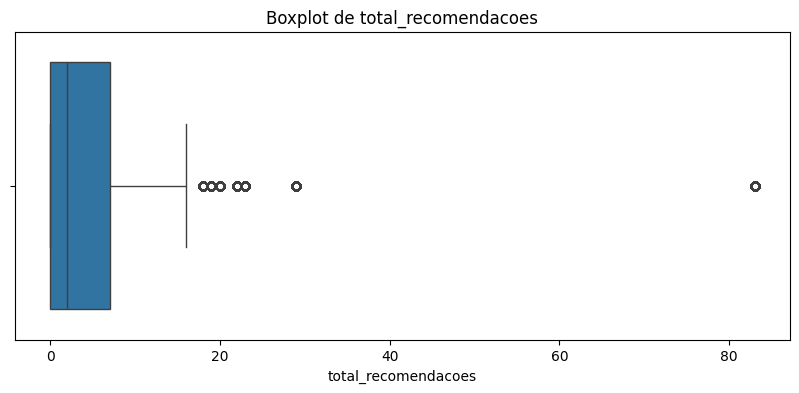

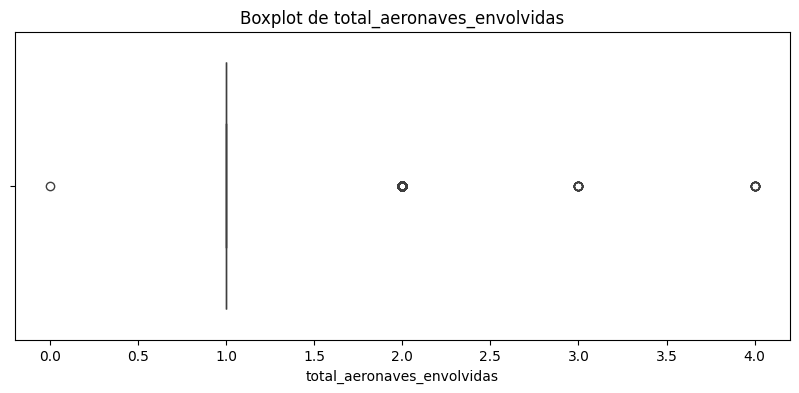

In [79]:
#Boxplots para Outliers: Verificação visual de outliers em variáveis numéricas.
for col in colunas_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_merged[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

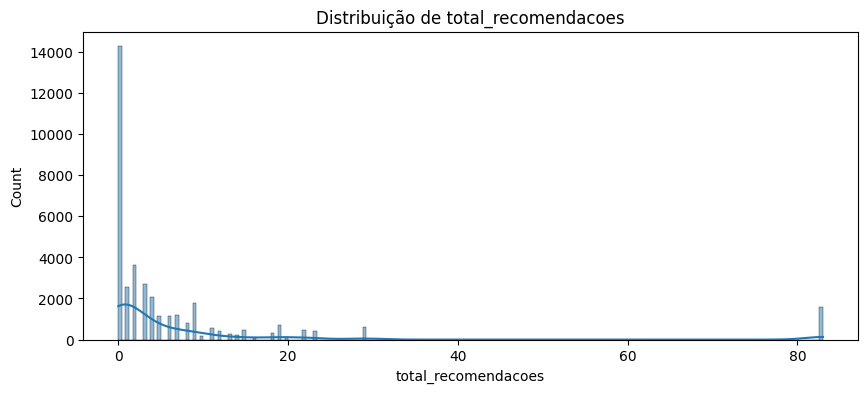

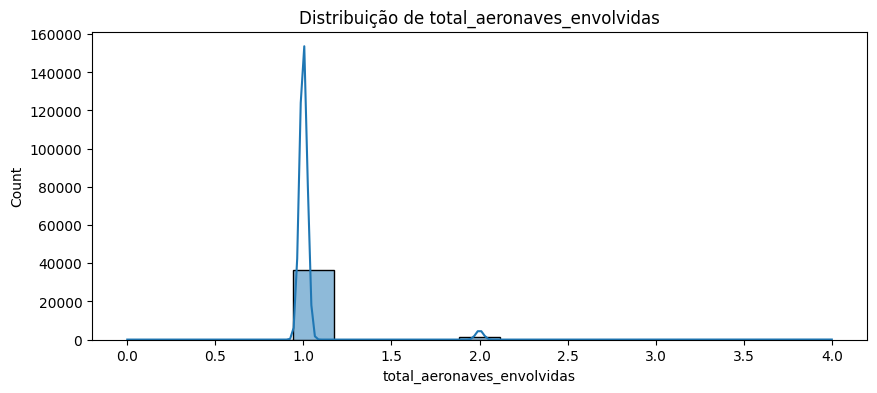

In [80]:
#Distribuição de Variáveis Numéricas: Vamos visualizar como os dados numéricos estão distribuídos e detectar possíveis outliers.
for col in colunas_numericas:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_merged[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

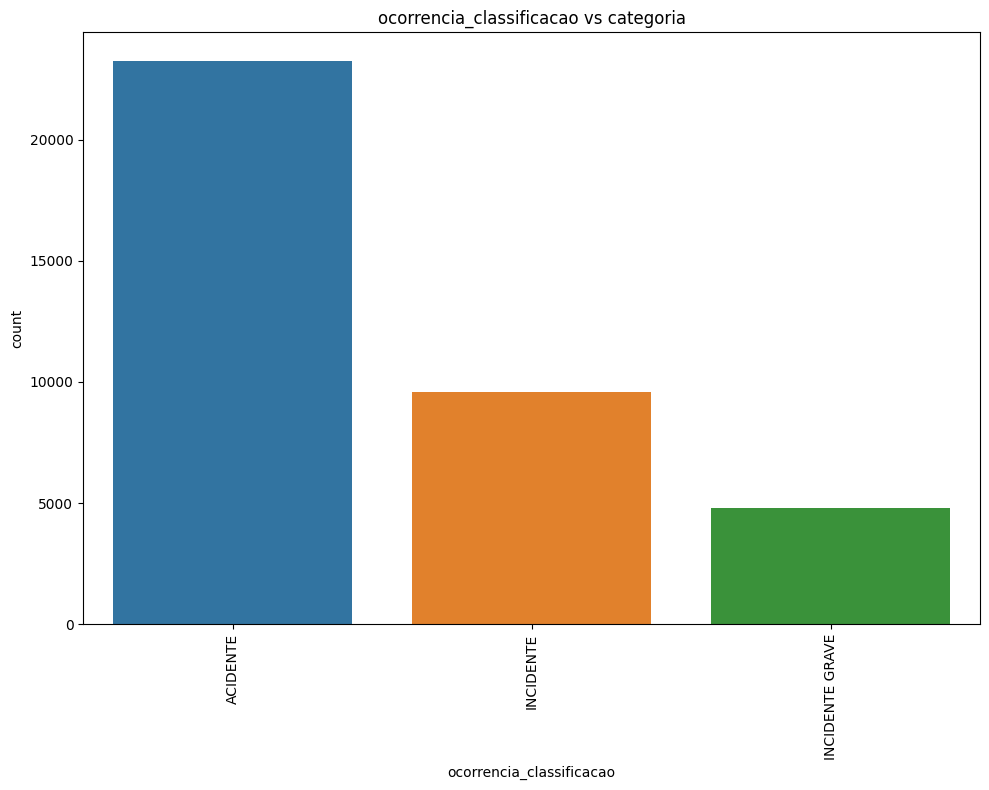

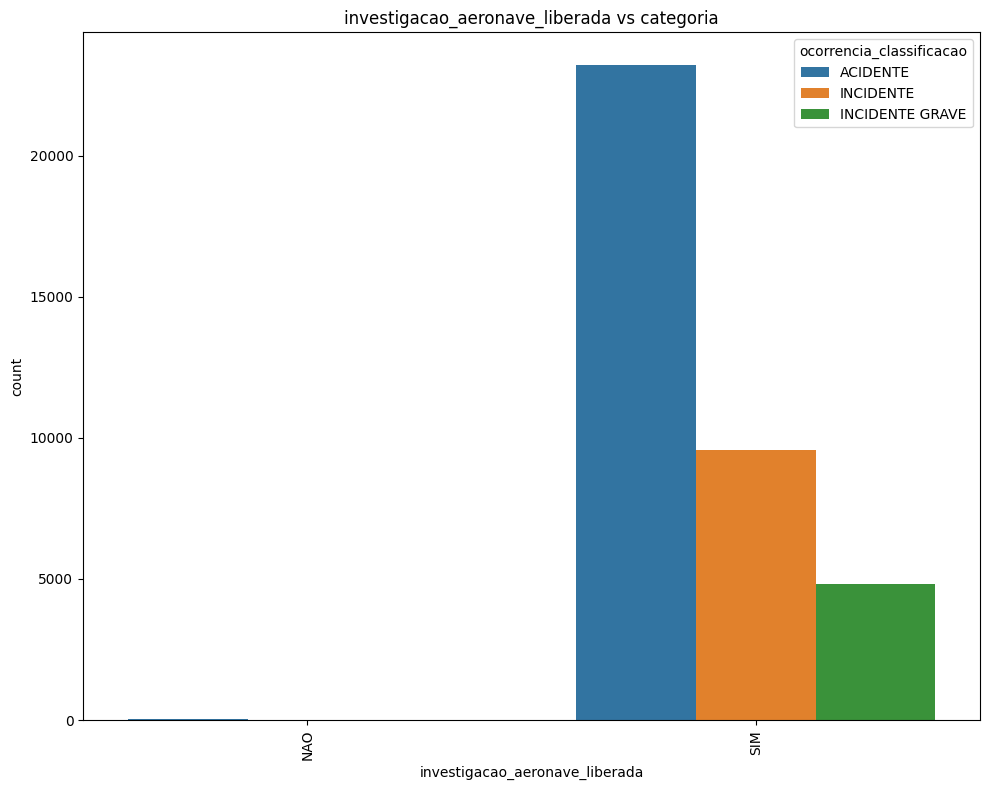

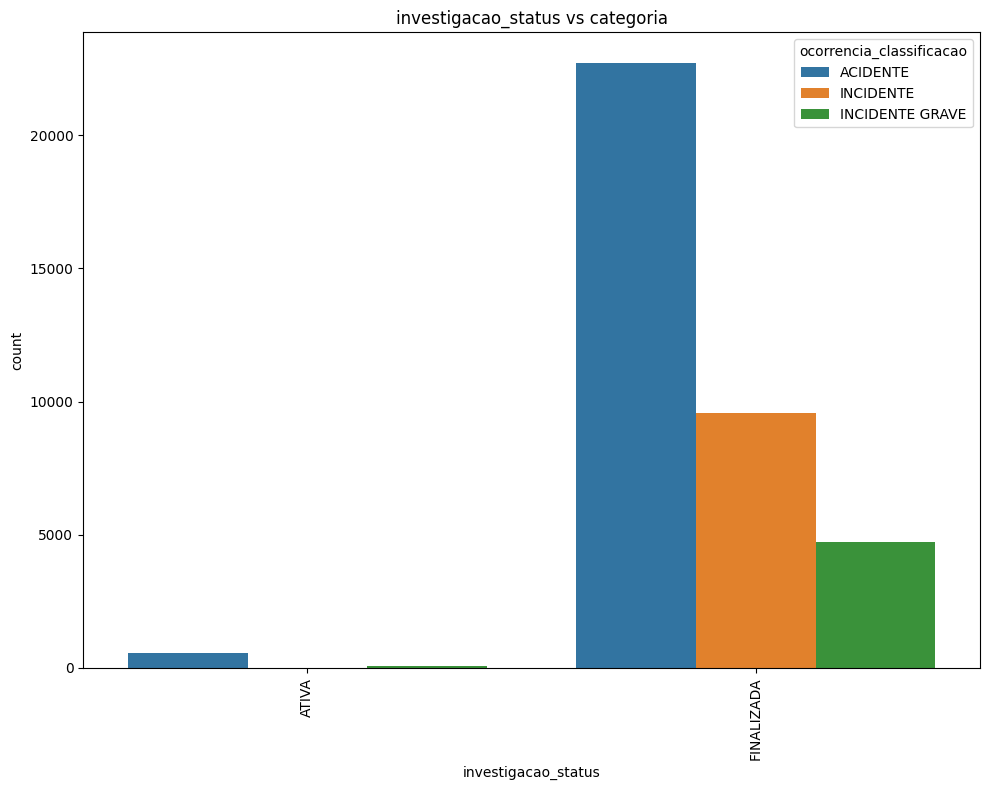

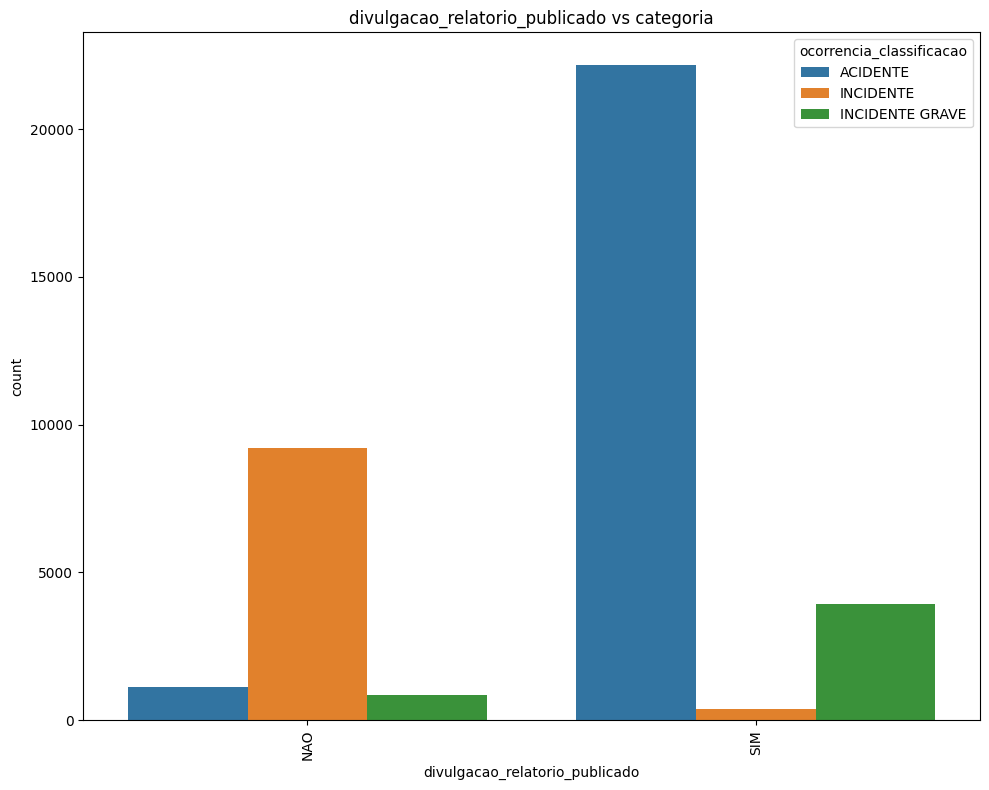

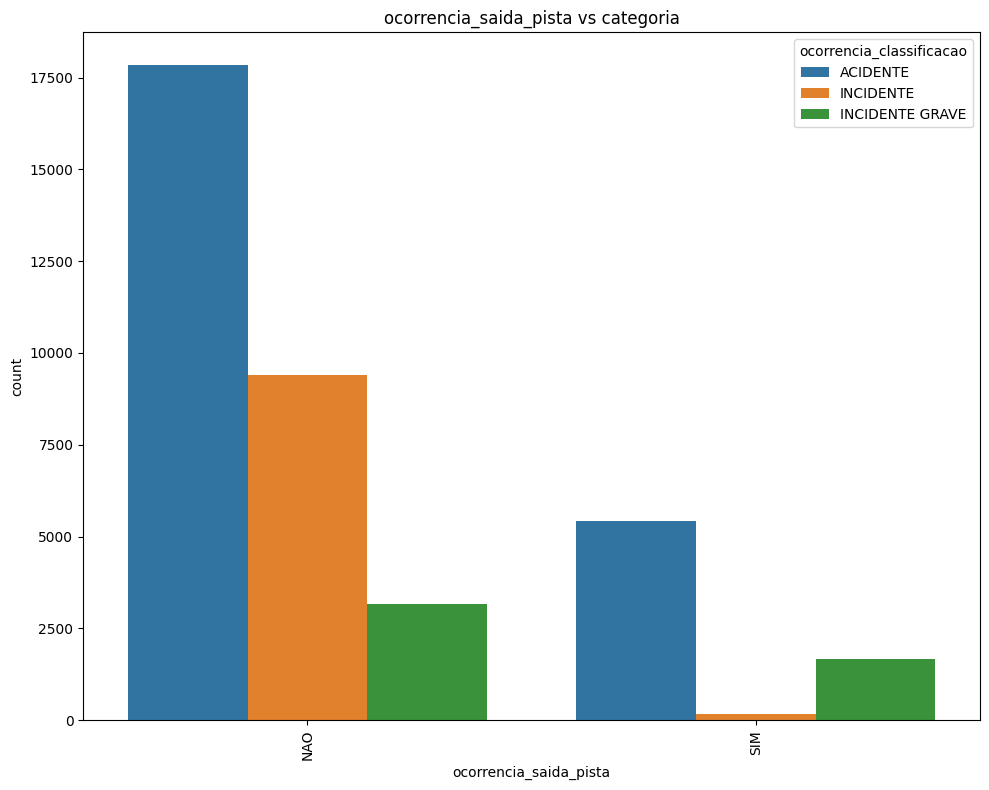

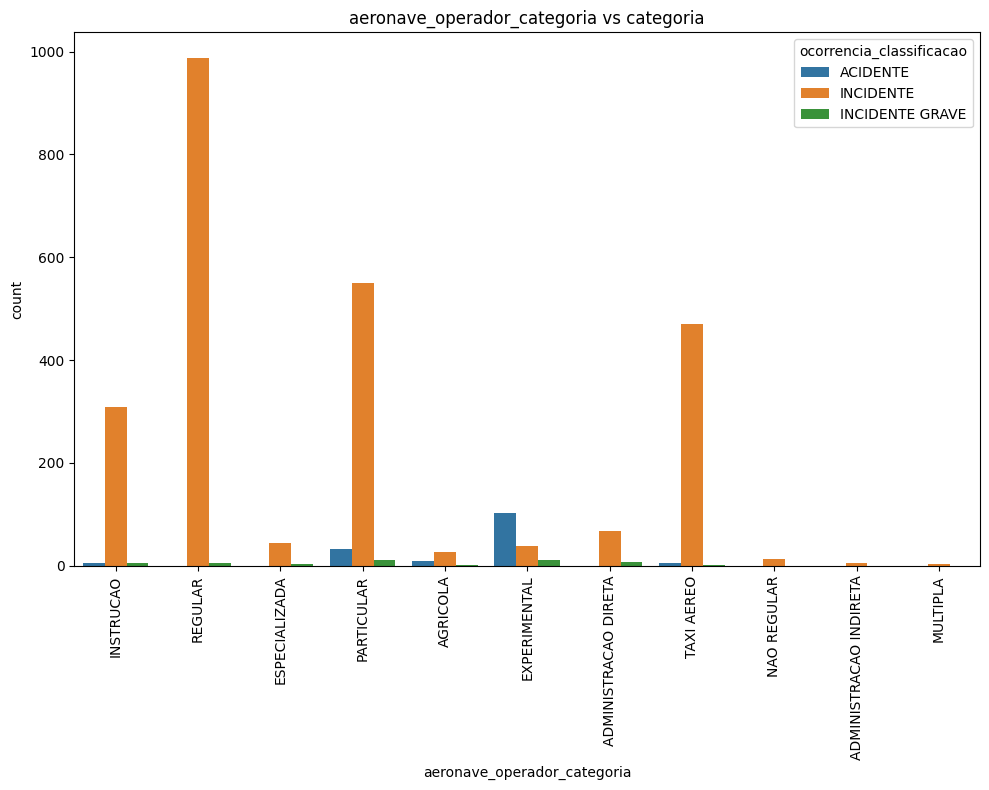

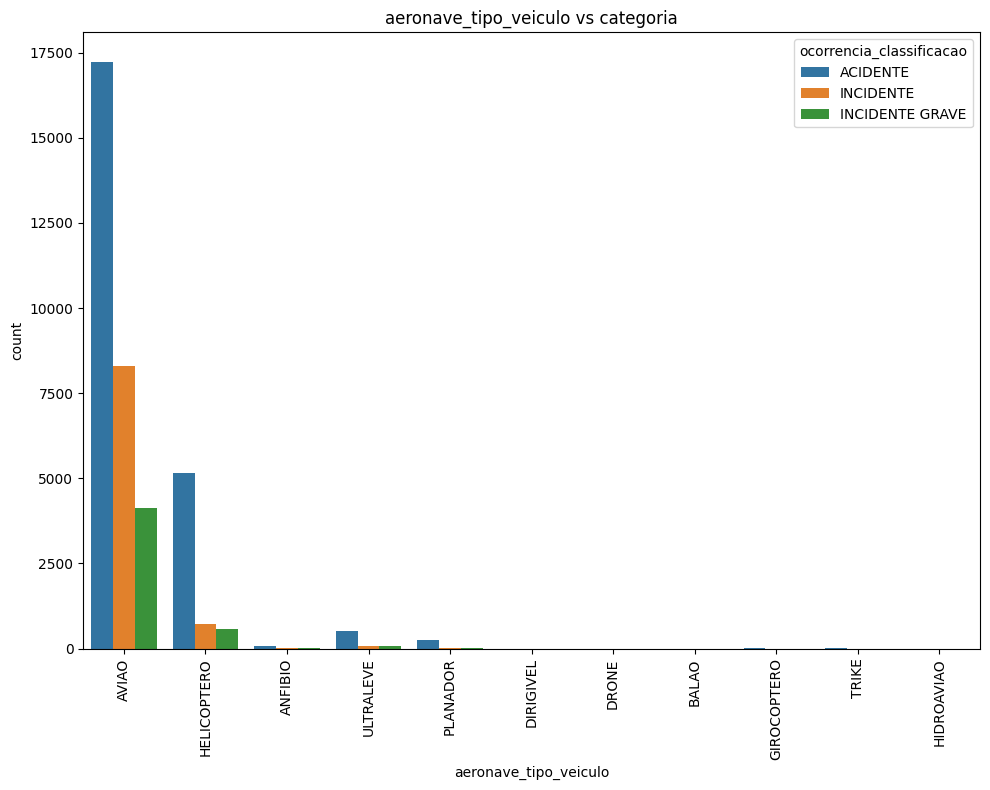

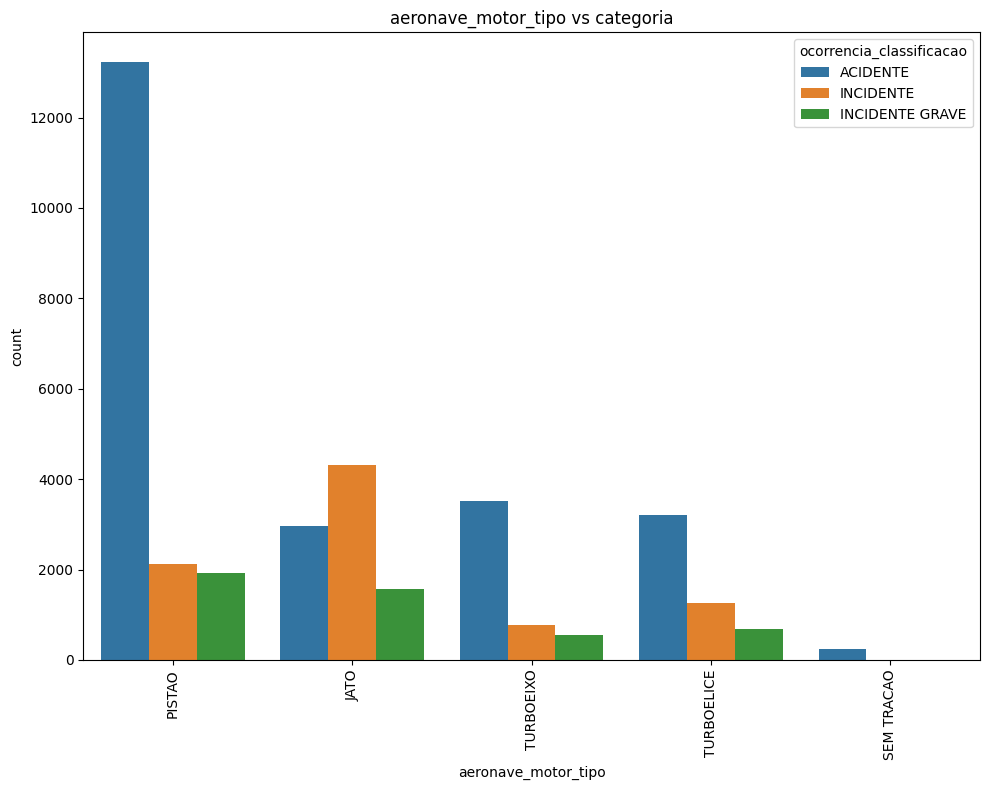

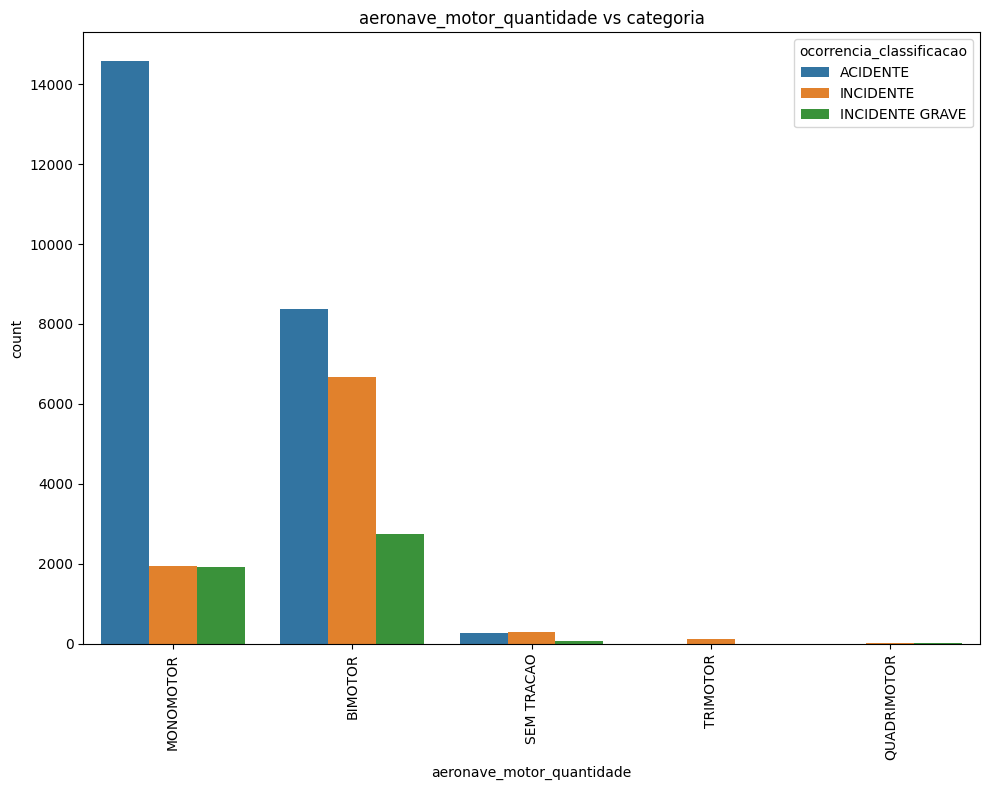

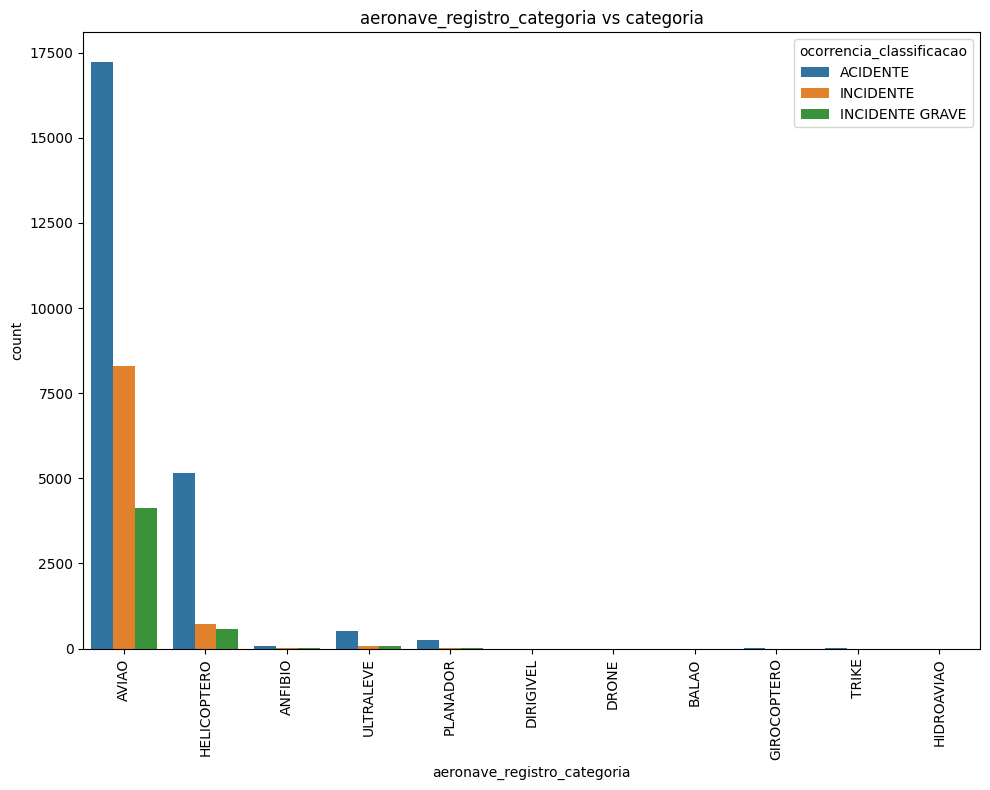

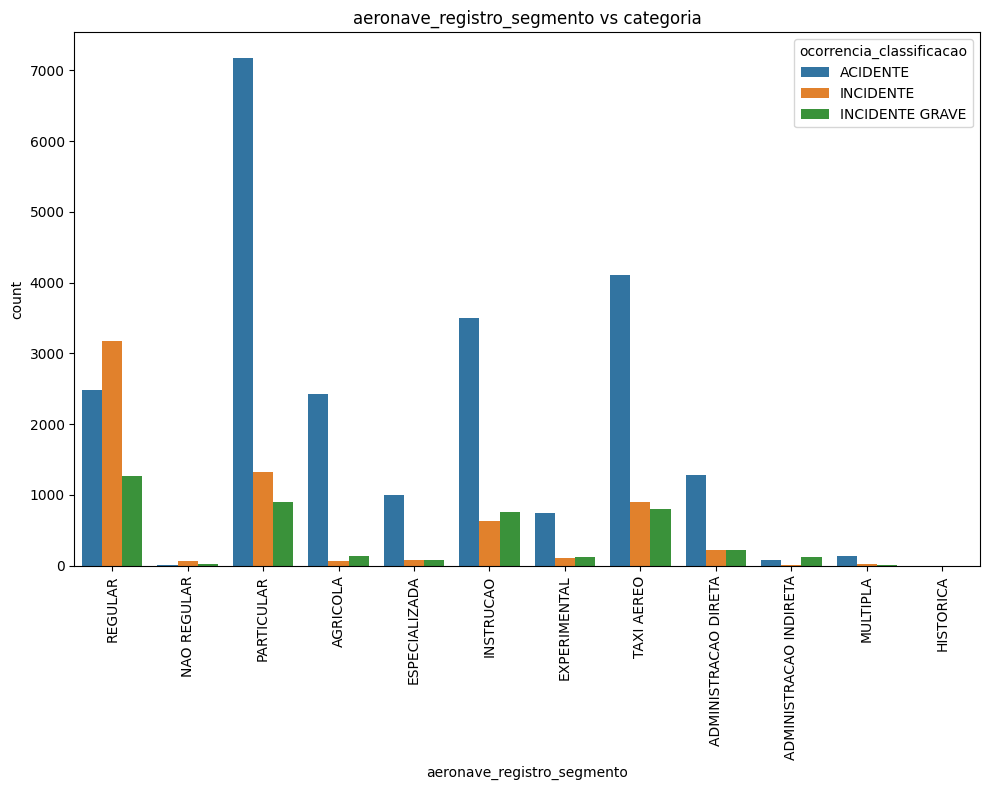

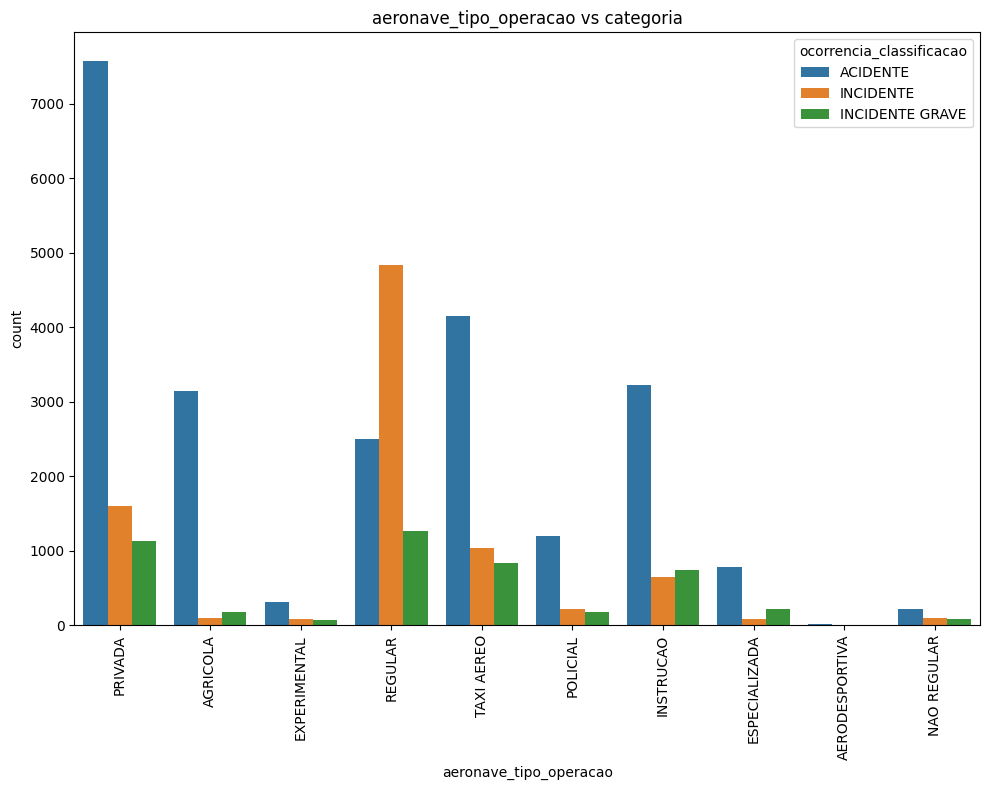

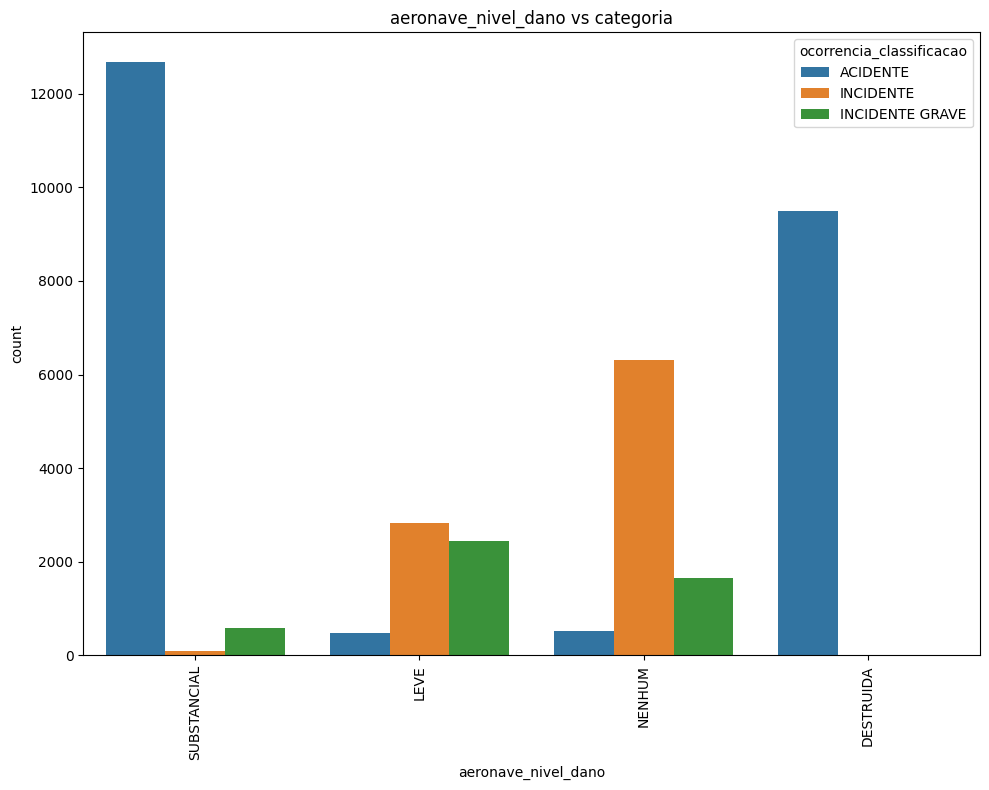

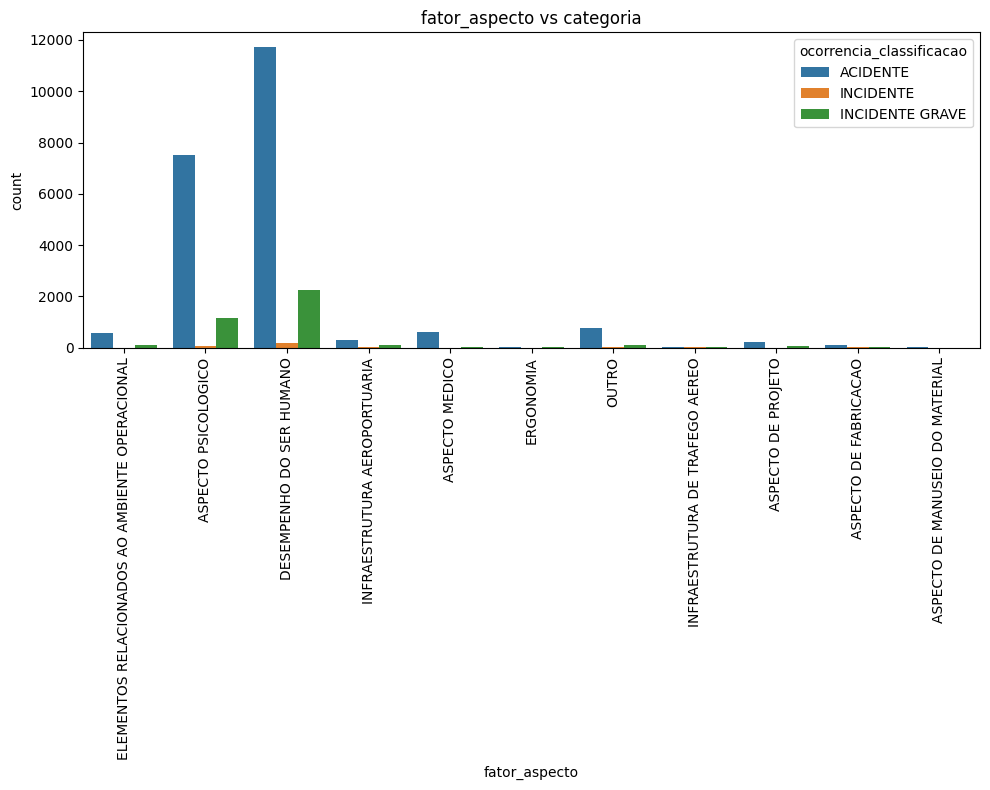

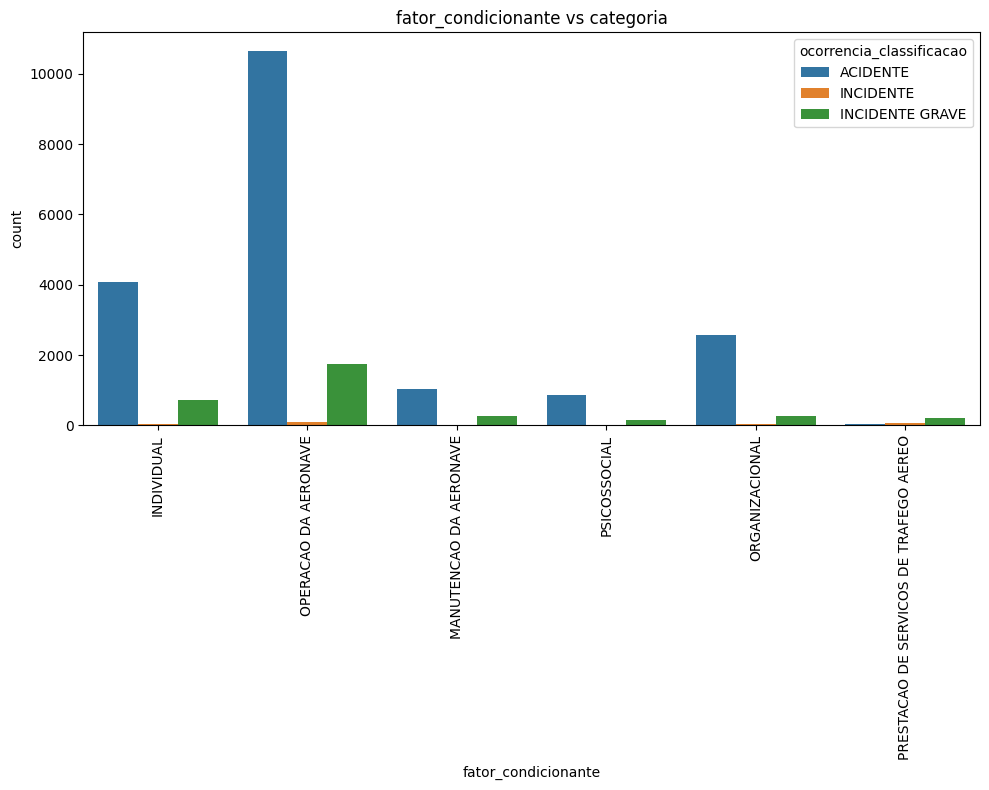

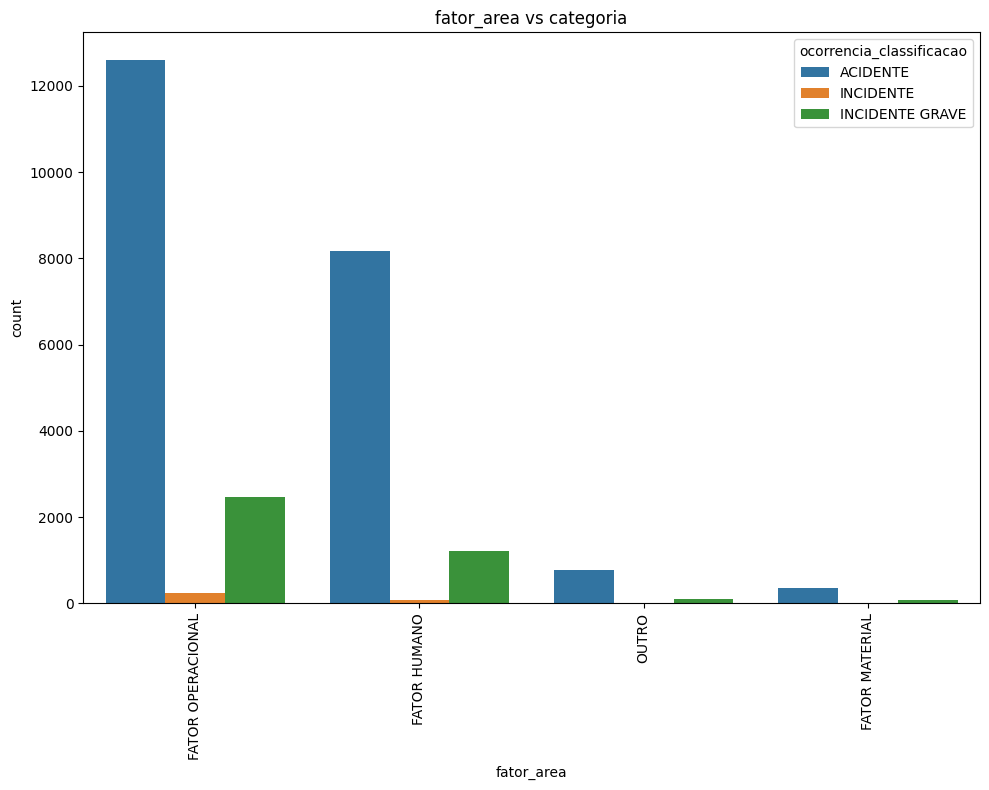

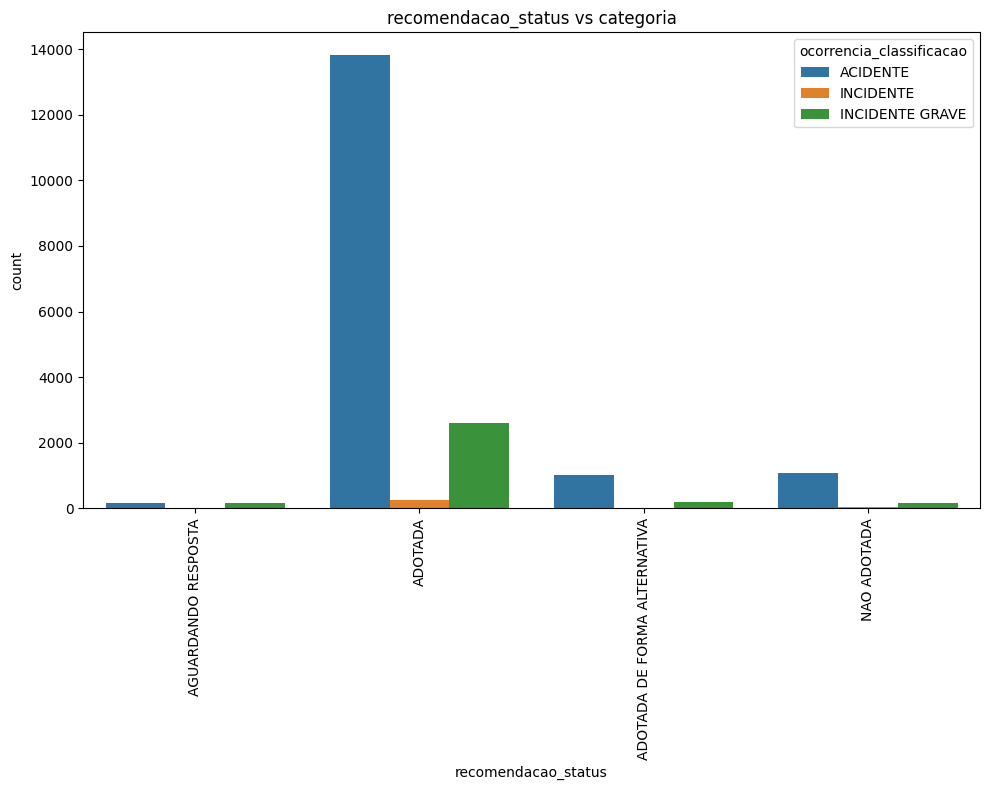

In [81]:
# Relação entre Variáveis Categóricas e a Categoria-Alvo: Vamos observar como as categorias de cada variável se distribuem por classe.
for col in colunas_categoricas:
    if df_merged[col].nunique() < 20:
        plt.figure(figsize=(10, 8))
        sns.countplot(data=df_merged, x=col, hue='ocorrencia_classificacao')
        plt.title(f'{col} vs categoria')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [82]:
# Cardinalidade de Variáveis Categóricas: Ver quantas categorias existem em cada variável e sugerir agrupamento de menos frequentes.
for col in colunas_categoricas:
    print(f'{col}: {df_merged[col].nunique()} categorias')
    print(df_merged[col].value_counts().tail())
    print('-' * 40)

ocorrencia_classificacao: 3 categorias
ocorrencia_classificacao
ACIDENTE           23268
INCIDENTE           9572
INCIDENTE GRAVE     4809
Name: count, dtype: int64
----------------------------------------
ocorrencia_cidade: 1425 categorias
ocorrencia_cidade
ENGENHEIRO COELHO           1
BELMONTE                    1
ITAUCU                      1
GUARABIRA                   1
SANTO ANTONIO DA PLATINA    1
Name: count, dtype: int64
----------------------------------------
ocorrencia_uf: 27 categorias
ocorrencia_uf
SE    255
RO    230
RN    203
PB    102
AP     67
Name: count, dtype: int64
----------------------------------------
ocorrencia_aerodromo: 749 categorias
ocorrencia_aerodromo
SJJJ    1
SIAE    1
SSUM    1
9PKD    1
SIPJ    1
Name: count, dtype: int64
----------------------------------------
ocorrencia_dia: 5108 categorias
ocorrencia_dia
10/08/2013    1
11/08/2013    1
16/08/2013    1
18/06/2020    1
20/11/2020    1
Name: count, dtype: int64
------------------------------------

Ocorrencias por Estado

<Axes: title={'center': 'Ocorrências por Estado'}, xlabel='Estado', ylabel='Quantidade de Ocorrências'>

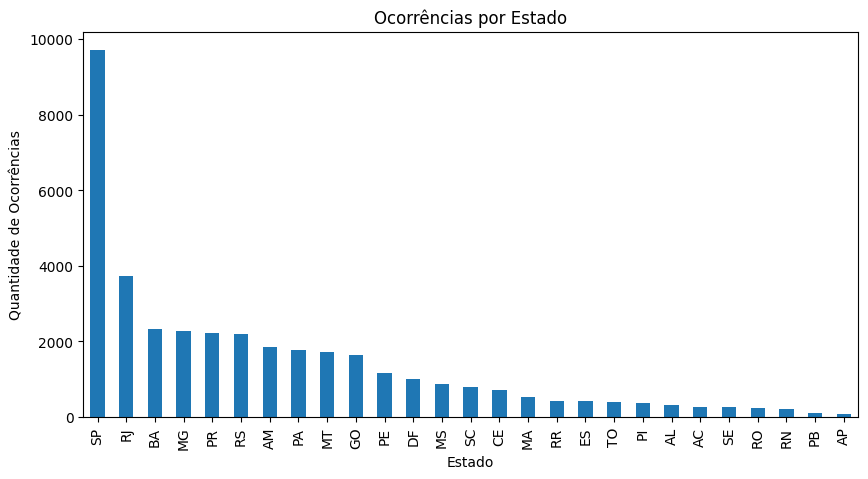

In [83]:
df_merged['ocorrencia_uf'].value_counts().plot(kind='bar', title='Ocorrências por Estado', xlabel='Estado', ylabel='Quantidade de Ocorrências',figsize=(10, 5))


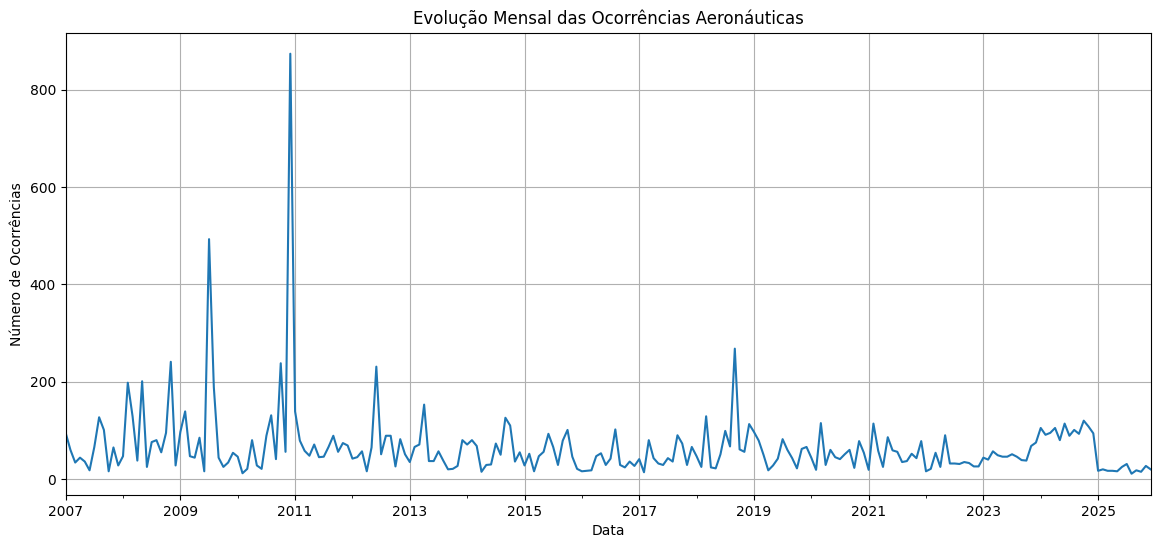

In [84]:
df_merged['ocorrencia_dia'] = pd.to_datetime(df_merged['ocorrencia_dia'], errors='coerce')

plt.figure(figsize=(14, 6))
df_merged.set_index('ocorrencia_dia').resample('ME').size().plot()
plt.title('Evolução Mensal das Ocorrências Aeronáuticas')
plt.xlabel('Data')
plt.ylabel('Número de Ocorrências')
plt.grid()
plt.show()

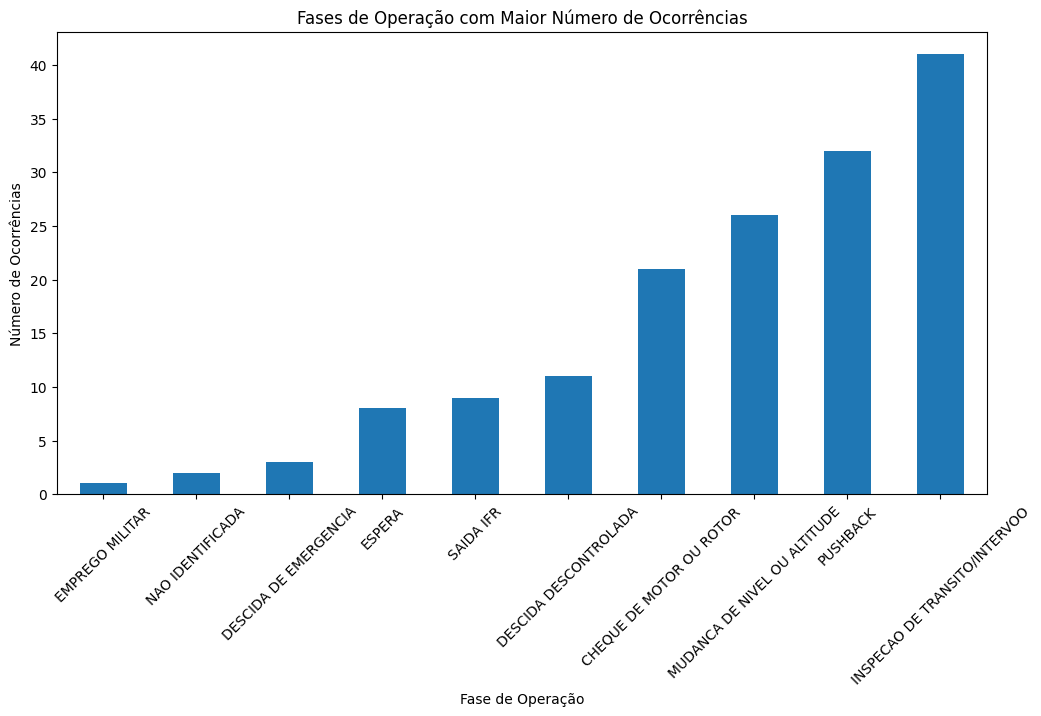

In [85]:
plt.figure(figsize=(12, 6))
df_merged['aeronave_fase_operacao'].value_counts().sort_values().head(10).plot(kind='bar')
plt.title('Fases de Operação com Maior Número de Ocorrências')
plt.xlabel('Fase de Operação')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

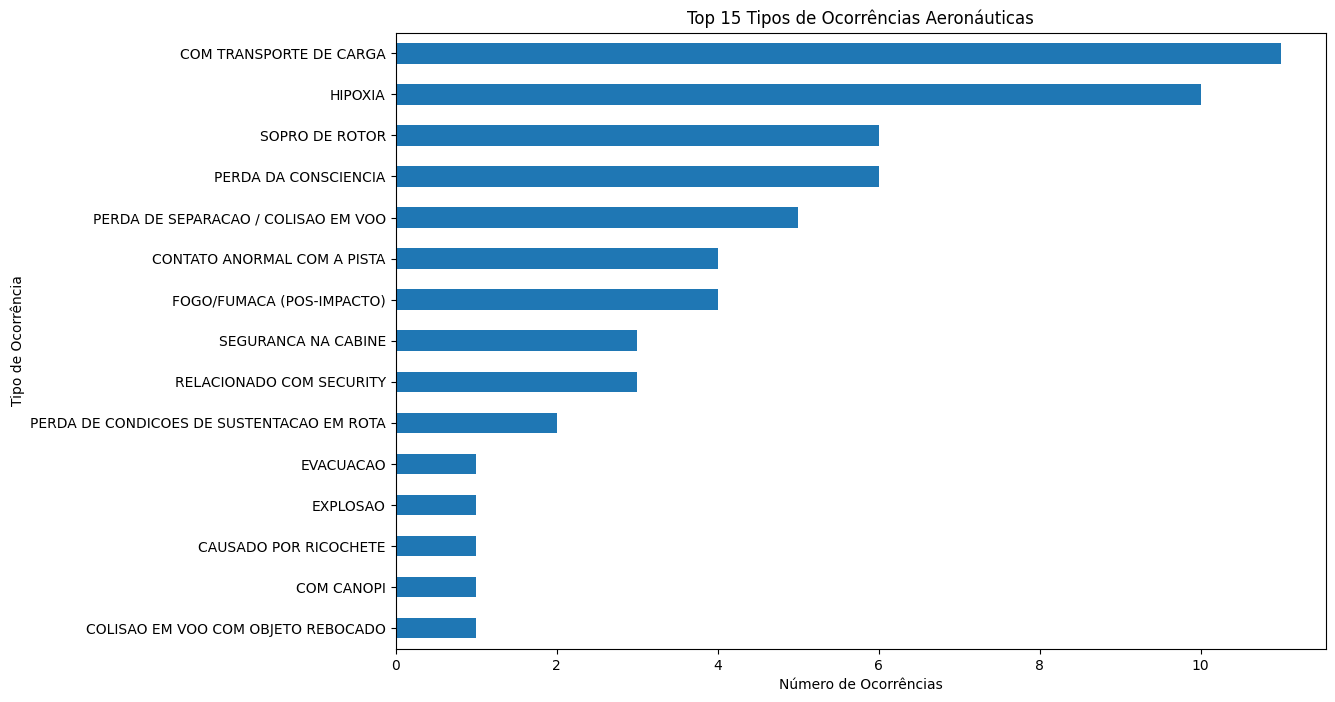

In [86]:
plt.figure(figsize=(12, 8))
df_merged['ocorrencia_tipo'].value_counts(ascending=True).head(15).plot(kind='barh')
plt.title('Top 15 Tipos de Ocorrências Aeronáuticas')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tipo de Ocorrência')
plt.show()

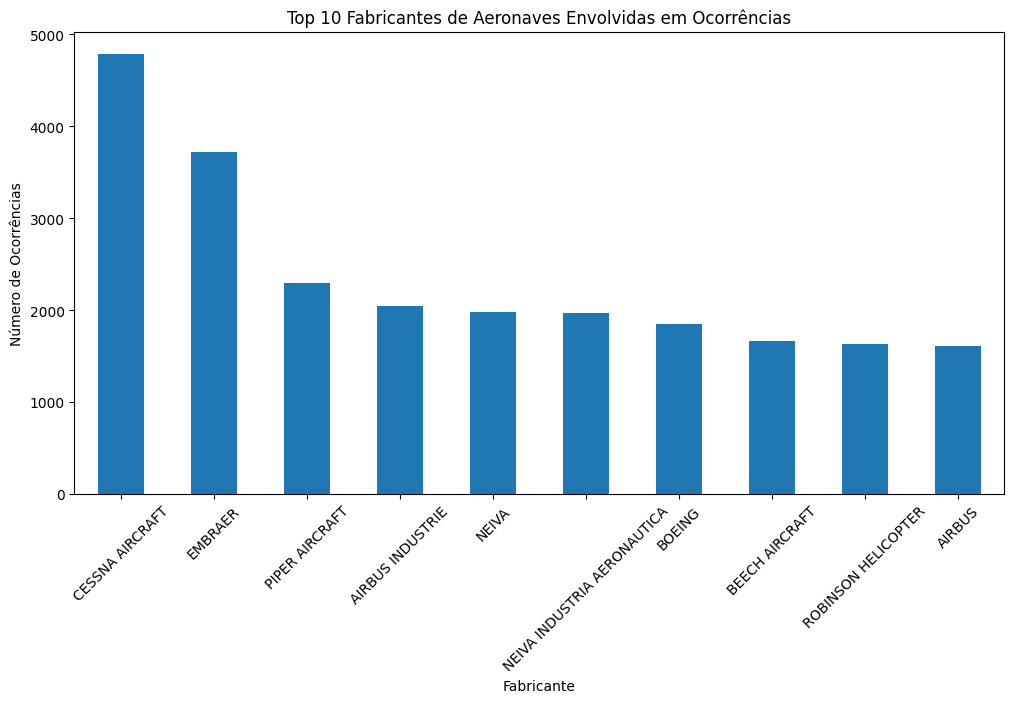

In [87]:
plt.figure(figsize=(12, 6))
df_merged['aeronave_fabricante'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Fabricantes de Aeronaves Envolvidas em Ocorrências')
plt.xlabel('Fabricante')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

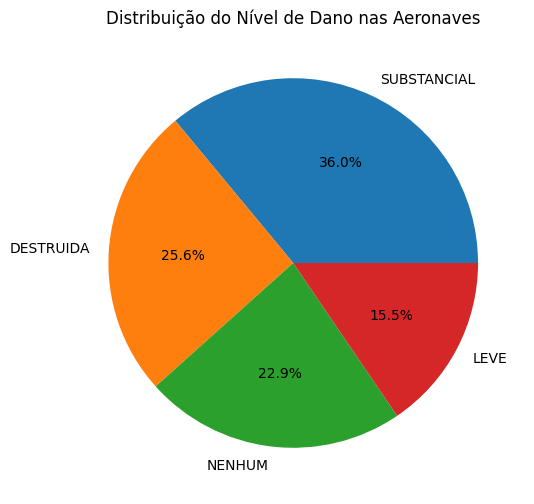

In [88]:
plt.figure(figsize=(10, 6))
df_merged['aeronave_nivel_dano'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição do Nível de Dano nas Aeronaves')
plt.ylabel('')
plt.show()

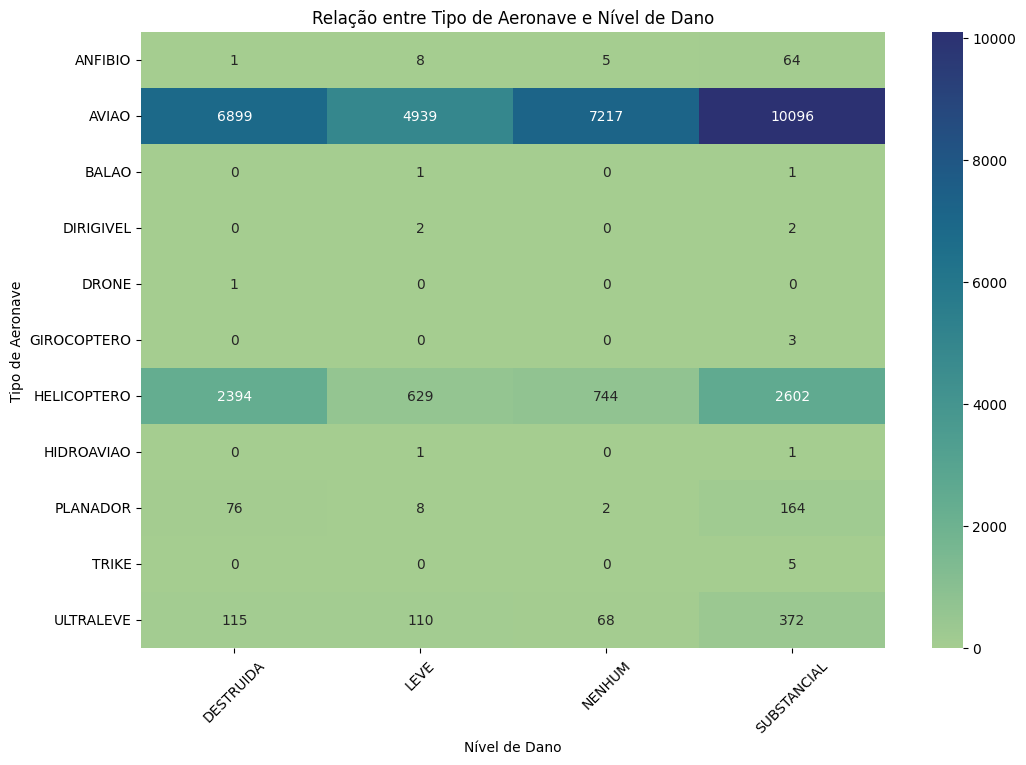

In [89]:

plt.figure(figsize=(12, 8))
cross_tab = pd.crosstab(df_merged['aeronave_tipo_veiculo'], df_merged['aeronave_nivel_dano'])
sns.heatmap(cross_tab, cmap='crest', annot=True, fmt='d')
plt.title('Relação entre Tipo de Aeronave e Nível de Dano')
plt.xlabel('Nível de Dano')
plt.ylabel('Tipo de Aeronave')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


idade_aeronave
Velho (<1990)                15795
Intermediário (1990-2009)    14975
Novo (2010+)                  5790
Name: count, dtype: int64


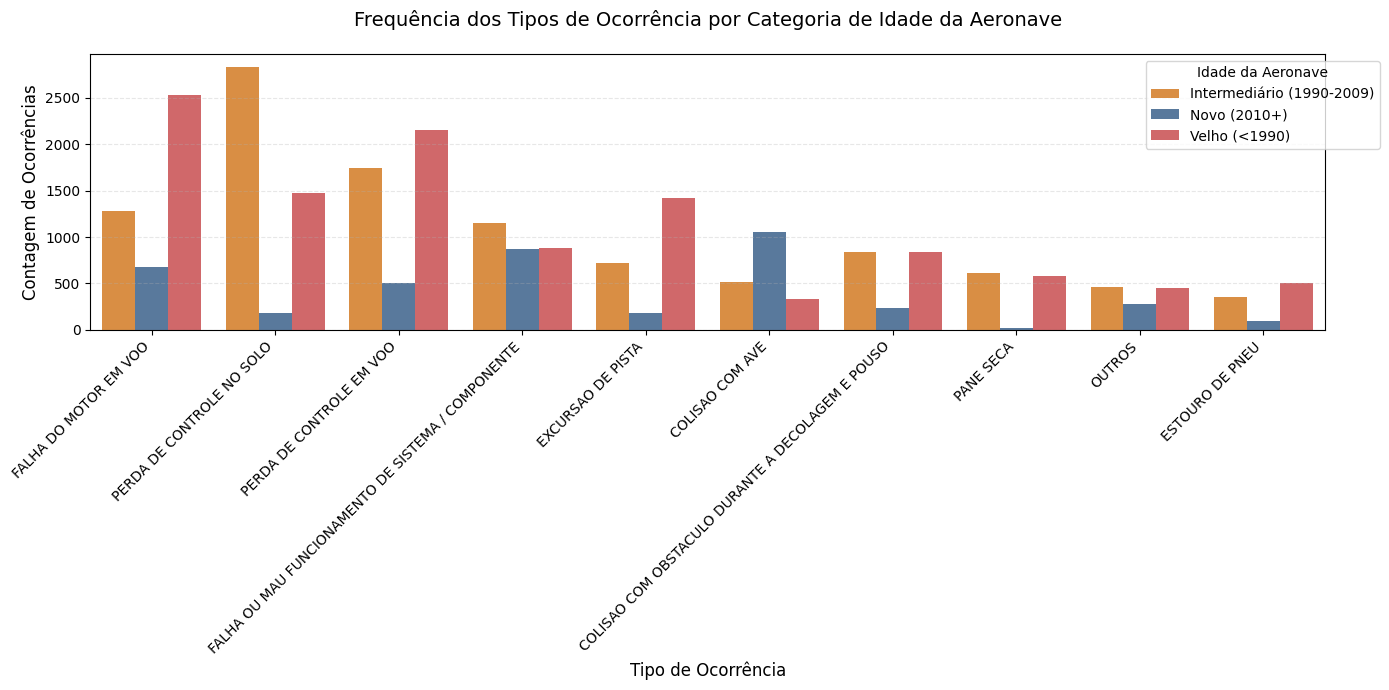

In [90]:

# Criar categorias baseadas no ano de fabricação
def categorizar_idade(ano):
    if pd.isna(ano):
        return None
    ano = int(ano)
    if ano >= 2010:
        return 'Novo (2010+)'
    elif ano >= 1990:
        return 'Intermediário (1990-2009)'
    else:
        return 'Velho (<1990)'

# Aplicar a categorização
df_merged['idade_aeronave'] = df_merged['aeronave_ano_fabricacao'].apply(categorizar_idade)

# Verificar a distribuição
print(df_merged['idade_aeronave'].value_counts())

# Filtrar os 5 tipos mais comuns de ocorrência
top_5_ocorrencias = df_merged['ocorrencia_tipo'].value_counts().head(10).index
df_top = df_merged[df_merged['ocorrencia_tipo'].isin(top_5_ocorrencias)].dropna(subset=['idade_aeronave'])

# Configurar o gráfico
plt.figure(figsize=(14, 7))
sns.countplot(data=df_top, 
              x='ocorrencia_tipo', 
              hue='idade_aeronave',
              palette={'Novo (2010+)': '#4e79a7', 
                       'Intermediário (1990-2009)': '#f28e2b', 
                       'Velho (<1990)': '#e15759'},
              order=top_5_ocorrencias)

# Ajustes estéticos
plt.title('Frequência dos Tipos de Ocorrência por Categoria de Idade da Aeronave', pad=20, fontsize=14)
plt.xlabel('Tipo de Ocorrência', fontsize=12)
plt.ylabel('Contagem de Ocorrências', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Idade da Aeronave', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [91]:
# Verificando a quantidade de valores ausentes por coluna
missing_values = df_merged.isnull().sum()
missing_percent = (missing_values / len(df_merged)) * 100

# Criando um DataFrame para visualização
missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))


Resumo de valores ausentes por coluna:
                                 Total Ausentes  Percentual (%)
aeronave_operador_categoria               34934       92.788653
ocorrencia_dia                            22782       60.511567
recomendacao_dia_feedback                 18401       48.875136
recomendacao_status                       18099       48.072990
fator_condicionante                       14754       39.188292
recomendacao_conteudo                     14263       37.884140
recomendacao_destinatario                 14263       37.884140
recomendacao_destinatario_sigla           14263       37.884140
recomendacao_numero                       14263       37.884140
recomendacao_dia_assinatura               14263       37.884140
recomendacao_dia_encaminhamento           14263       37.884140
fator_nome                                11493       30.526707
fator_area                                11493       30.526707
fator_aspecto                             11493       30.526707


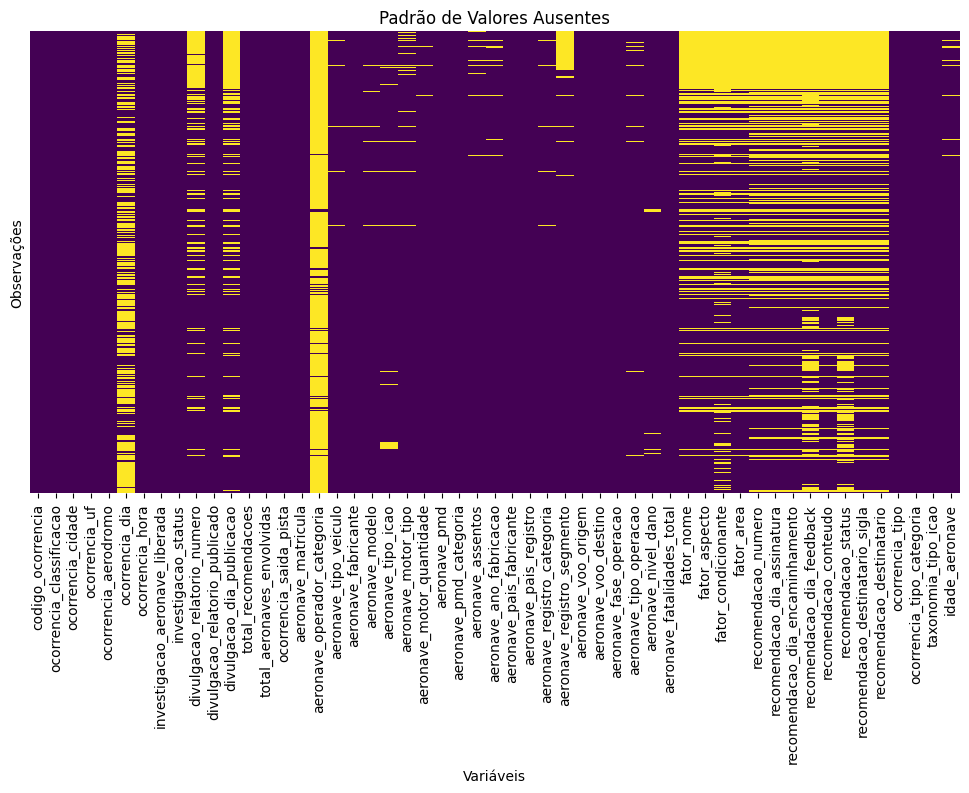

In [92]:
# Visualizando o padrão de valores ausentes
plt.figure(figsize=(12, 6))
sns.heatmap(df_merged.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Padrão de Valores Ausentes')
plt.xlabel('Variáveis')
plt.ylabel('Observações')
plt.show()

<Figure size 1200x600 with 0 Axes>

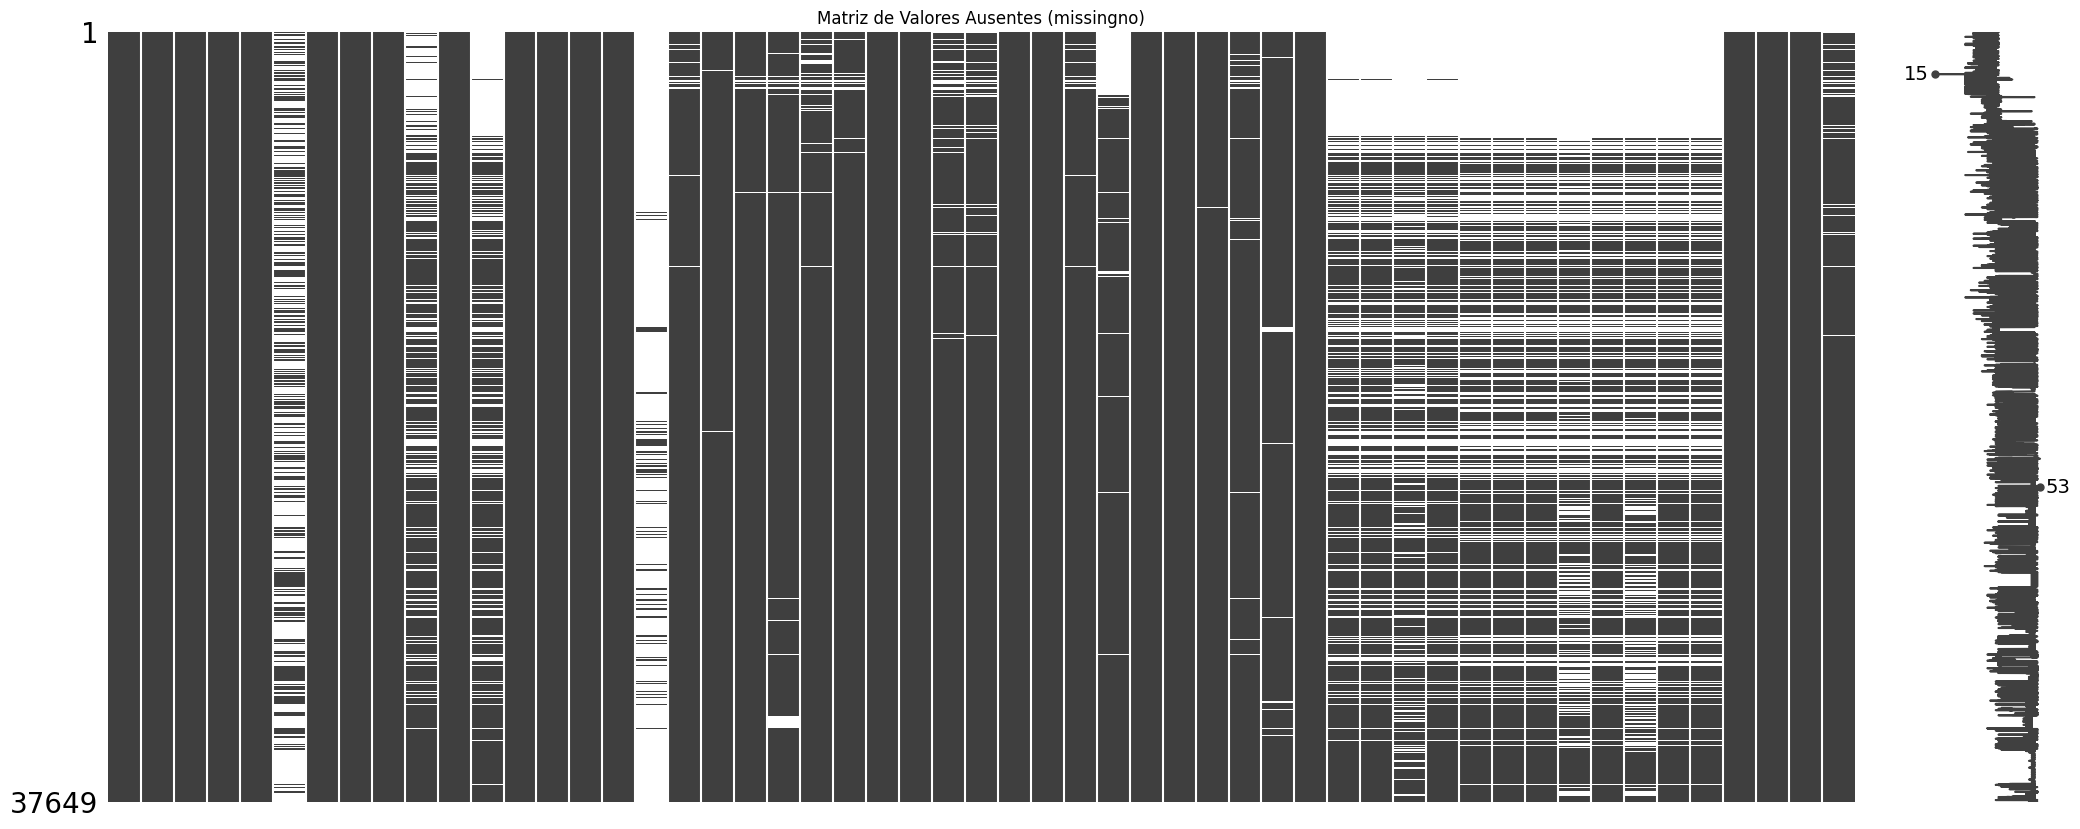

In [93]:
# Usando a biblioteca missingno para visualização especializada
plt.figure(figsize=(12, 6))
msno.matrix(df_merged)
plt.title('Matriz de Valores Ausentes (missingno)')
plt.show()

<Figure size 1000x800 with 0 Axes>

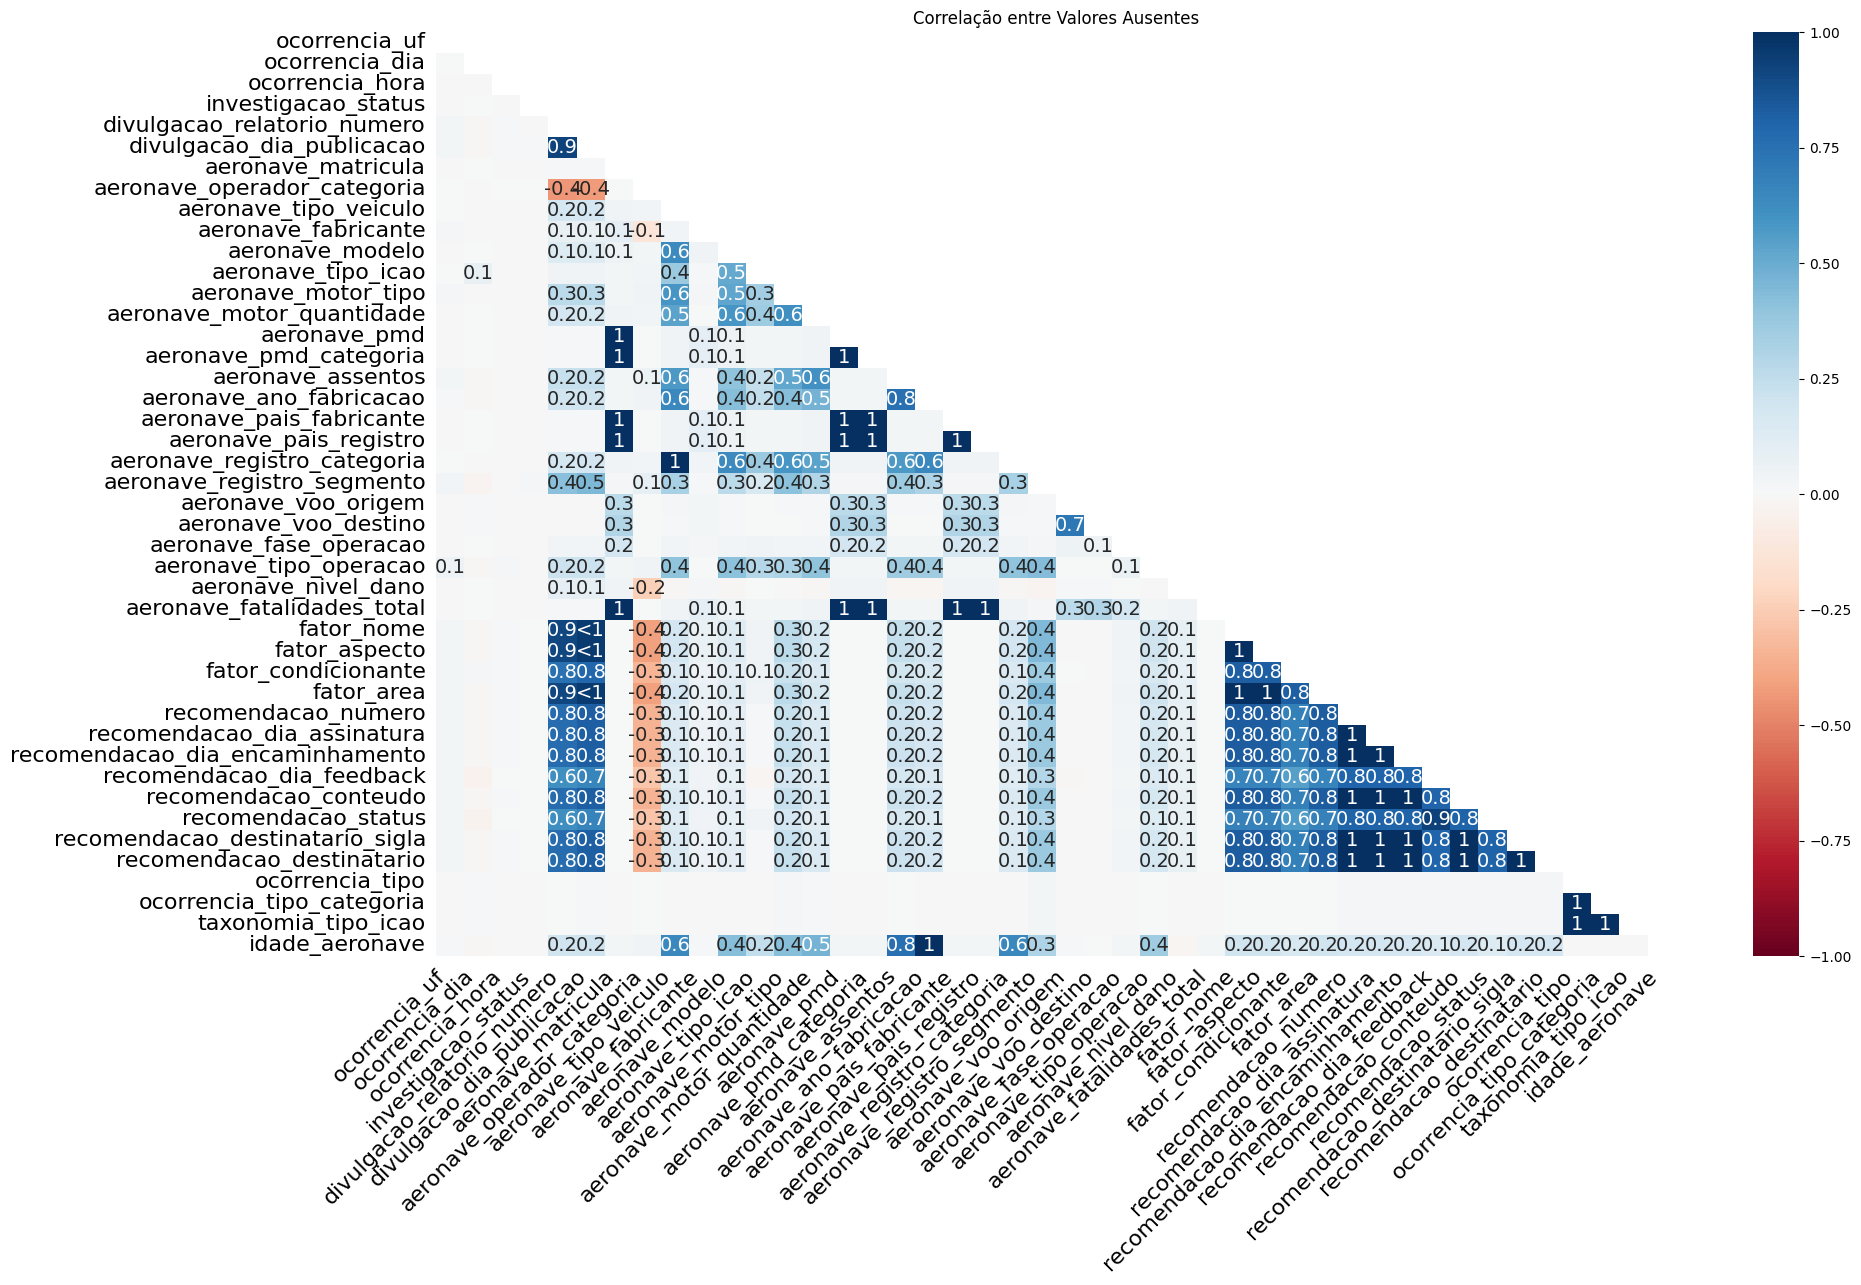

In [94]:
# Visualizando a correlação entre valores ausentes
plt.figure(figsize=(10, 8))
msno.heatmap(df_merged)
plt.title('Correlação entre Valores Ausentes')
plt.show()

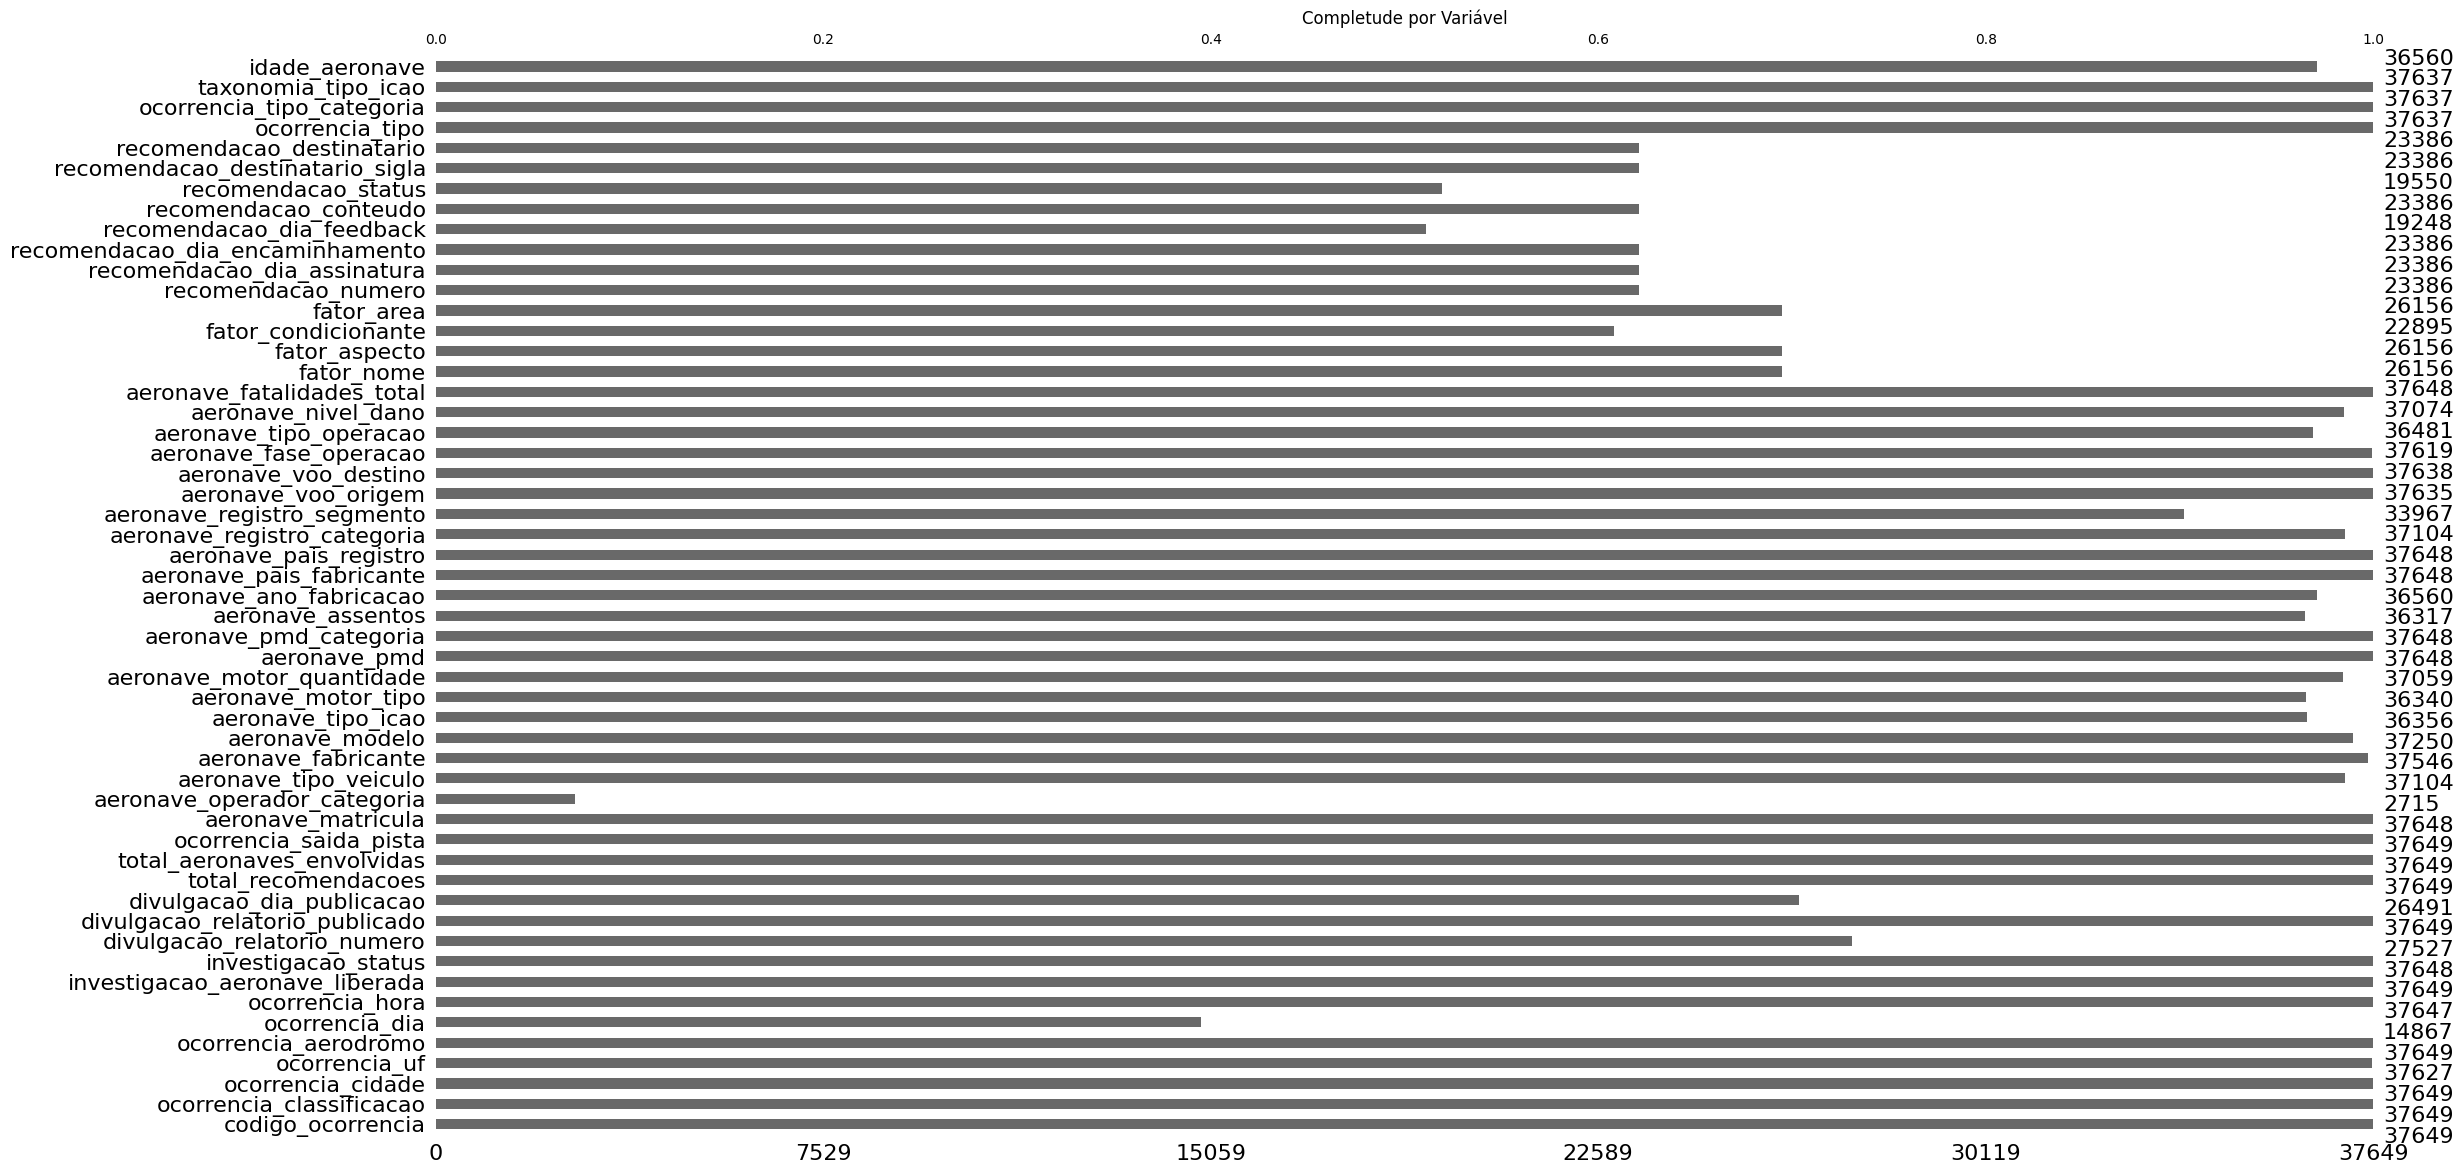

In [95]:
# Análise de valor ausente por variável
plt.figure(figsize=(12, 6))
msno.bar(df_merged)
plt.title('Completude por Variável')
plt.show()

In [96]:
df_temp = df_merged.copy()

colunas_com_ausencia = df_temp.columns[df_temp.isnull().any()].tolist()

colunas_categoricas = df_temp.select_dtypes(include='object').columns.tolist()
colunas_categoricas = [col for col in colunas_categoricas if df_temp[col].nunique() < 50]

resultados_categoricos = []

In [97]:
for var_ausente in colunas_com_ausencia:
    df_temp['ausente'] = df_temp[var_ausente].isnull()

    for var_cat in colunas_categoricas:
        if var_cat == var_ausente:
            continue

        cont_table = pd.crosstab(df_temp[var_cat], df_temp['ausente'])

        if cont_table.shape[0] < 2 or cont_table.shape[1] < 2:
            continue

        chi2, p, dof, expected = chi2_contingency(cont_table)
        conclusao = "Provavelmente MAR ou MNAR" if p < 0.05 else "Pode ser MCAR"

        resultados_categoricos.append({
            'variavel_com_ausencia': var_ausente,
            'variavel_categorica': var_cat,
            'p_valor': round(p, 4),
            'conclusao': conclusao
        })

In [98]:
resultado_df_cat = pd.DataFrame(resultados_categoricos)
resultado_df_cat = resultado_df_cat.sort_values(by='p_valor')
display(resultado_df_cat)

,variavel_com_ausencia,variavel_categorica,p_valor,conclusao
0,ocorrencia_uf,ocorrencia_classificacao,0.0,Provavelmente MAR ou MNAR
543,fator_aspecto,aeronave_pais_registro,0.0,Provavelmente MAR ou MNAR
544,fator_aspecto,aeronave_registro_categoria,0.0,Provavelmente MAR ou MNAR
545,fator_aspecto,aeronave_registro_segmento,0.0,Provavelmente MAR ou MNAR
546,fator_aspecto,aeronave_fase_operacao,0.0,Provavelmente MAR ou MNAR
...,...,...,...,...
780,ocorrencia_tipo,aeronave_pais_fabricante,1.0,Pode ser MCAR
510,aeronave_fatalidades_total,ocorrencia_saida_pista,1.0,Pode ser MCAR
773,ocorrencia_tipo,investigacao_aeronave_liberada,1.0,Pode ser MCAR
288,aeronave_pmd,investigacao_status,1.0,Pode ser MCAR


In [99]:
# Separando listas com base nas classificações
mcar_vars = resultado_df_cat[resultado_df_cat['conclusao'] == 'Pode ser MCAR']['variavel_com_ausencia'].unique()
mar_mnar_vars = resultado_df_cat[resultado_df_cat['conclusao'] == 'Provavelmente MAR ou MNAR']['variavel_com_ausencia'].unique()

df_tratado = df_merged.copy()

In [100]:
# 1. MCAR – substituir valores ausentes por "UNKNOWN"
for col in mcar_vars:
    if col in df_tratado.columns and df_tratado[col].dtype == 'object':  
        df_tratado[col] = df_tratado[col].fillna('UNKNOWN')

display(df_tratado)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave
0,86954,ACIDENTE,TUPANCIRETA,RS,SIPJ,2025-04-04,17:20:00,NAO,ATIVA,A DEFINIR,NAO,UNKNOWN,0,1,NAO,PTOCO,UNKNOWN,AVIAO,PIPER AIRCRAFT,PA-28R-201,P28R,PISTAO,MONOMOTOR,1247.0,1247.0,4.0,1990.0,BRASIL,BRASIL,AVIAO,NaN,AERO PARQUE TUPA,SANTA MARIA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISAO COM OBSTACULO DURANTE A DECOLAGEM E POUSO,COLISAO COM OBSTACULO DURANTE A DECOLAGEM E POUSO,CTOL,Intermediário (1990-2009)
1,86953,ACIDENTE,PILAR,AL,FAER,2025-04-04,09:05:00,SIM,ATIVA,A DEFINIR,NAO,UNKNOWN,0,1,NAO,PTUYQ,UNKNOWN,AVIAO,EMBRAER,EMB-202A,IPAN,PISTAO,MONOMOTOR,1800.0,1800.0,1.0,2010.0,BRASIL,BRASIL,AVIAO,NaN,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,AGRICOLA,SUBSTANCIAL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,Novo (2010+)
2,86952,INCIDENTE,SAO LUIS,MA,SBSL,2025-03-04,20:45:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,1,NAO,PTZPH,UNKNOWN,AVIAO,INPAER - INDUSTRIA PAULISTA DE AERONAUTICA,EXPLORER,ZZZZ,PISTAO,MONOMOTOR,1200.0,1200.0,NaN,2014.0,BRASIL,BRASIL,AVIAO,NaN,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,POUSO,EXPERIMENTAL,LEVE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,Novo (2010+)
3,86951,INCIDENTE GRAVE,CHAPECO,SC,SBCH,NaT,22:30:00,SIM,ATIVA,IG-048/CENIPA/2025,NAO,UNKNOWN,0,1,SIM,PRMYM,UNKNOWN,AVIAO,AIRBUS,A319-112,A319,JATO,BIMOTOR,75500.0,75500.0,154.0,2011.0,BRASIL,BRASIL,AVIAO,NaN,GOVERNADOR ANDRE FRANCO MONTORO,SERAFIN ENOSS BERTASO,POUSO,REGULAR,LEVE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCURSAO DE PISTA,EXCURSAO DE PISTA,RE,Novo (2010+)
4,86950,INCIDENTE,GUARULHOS,SP,SBGR,2025-05-04,11:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,1,NAO,PRXMV,UNKNOWN,AVIAO,BOEING,737-8 MAX,B38M,UNKNOWN,BIMOTOR,82644.0,82644.0,0.0,2021.0,BRASIL,BRASIL,AVIAO,NaN,SENADOR PETRONIO PORTELLA,GOVERNADOR ANDRE FRANCO MONTORO,POUSO,REGULAR,LEVE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISAO COM AVE,COLISAO COM AVE,BIRD,Novo (2010+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37644,28256,ACIDENTE,MOGI GUACU,SP,FAER,2007-07-01,11:30:00,SIM,FINALIZADA,A-112/CENIPA/2012,SIM,2012-10-17,2,1,NAO,PTUKG,UNKNOWN,AVIAO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTAO,MONOMOTOR,1800.0,1800.0,1.0,1997.0,BRASIL,BRASIL,AVIAO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,ESPECIALIZADA,SUBSTANCIAL,0.0,PESSOAL DE APOIO,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR OPERACIONAL,438/2012,2012-10-17,2012-11-01,2013-03-13,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO AS E.

In [101]:
# 2. MAR/MNAR – SimpleImputer
colunas_categoricas = df_tratado.select_dtypes(include='object').columns
mar_mnar_cat = [col for col in mar_mnar_vars if col in colunas_categoricas]

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

outras_colunas = df_tratado.select_dtypes(include='object').columns.tolist()
colunas_para_usar = list(set(mar_mnar_cat + outras_colunas))

df_cat = df_tratado[colunas_para_usar].copy()

df_encoded = pd.DataFrame(encoder.fit_transform(df_cat), columns=colunas_para_usar)

imputer = SimpleImputer()
df_imputado = pd.DataFrame(imputer.fit_transform(df_encoded), columns=colunas_para_usar)

df_imputado_rounded = df_imputado.round(0)
df_final = pd.DataFrame(encoder.inverse_transform(df_imputado_rounded), columns=colunas_para_usar)

for col in mar_mnar_cat:
    df_tratado[col] = df_final[col]

display(df_tratado)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave
0,86954,ACIDENTE,TUPANCIRETA,RS,SIPJ,2025-04-04,17:20:00,NAO,ATIVA,A DEFINIR,NAO,UNKNOWN,0,1,NAO,PTOCO,UNKNOWN,AVIAO,PIPER AIRCRAFT,PA-28R-201,P28R,PISTAO,MONOMOTOR,1247.0,1247.0,4.0,1990.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERO PARQUE TUPA,SANTA MARIA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO COM OBSTACULO DURANTE A DECOLAGEM E POUSO,COLISAO COM OBSTACULO DURANTE A DECOLAGEM E POUSO,CTOL,Intermediário (1990-2009)
1,86953,ACIDENTE,PILAR,AL,FAER,2025-04-04,09:05:00,SIM,ATIVA,A DEFINIR,NAO,UNKNOWN,0,1,NAO,PTUYQ,UNKNOWN,AVIAO,EMBRAER,EMB-202A,IPAN,PISTAO,MONOMOTOR,1800.0,1800.0,1.0,2010.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,AGRICOLA,SUBSTANCIAL,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,Novo (2010+)
2,86952,INCIDENTE,SAO LUIS,MA,SBSL,2025-03-04,20:45:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,1,NAO,PTZPH,UNKNOWN,AVIAO,INPAER - INDUSTRIA PAULISTA DE AERONAUTICA,EXPLORER,ZZZZ,PISTAO,MONOMOTOR,1200.0,1200.0,NaN,2014.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,POUSO,EXPERIMENTAL,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,Novo (2010+)
3,86951,INCIDENTE GRAVE,CHAPECO,SC,SBCH,NaT,22:30:00,SIM,ATIVA,IG-048/CENIPA/2025,NAO,UNKNOWN,0,1,SIM,PRMYM,UNKNOWN,AVIAO,AIRBUS,A319-112,A319,JATO,BIMOTOR,75500.0,75500.0,154.0,2011.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,GOVERNADOR ANDRE FRANCO MONTORO,SERAFIN ENOSS BERTASO,POUSO,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,EXCURSAO DE PISTA,EXCURSAO DE PISTA,RE,Novo (2010+)
4,86950,INCIDENTE,GUARULHOS,SP,SBGR,2025-05-04,11:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,1,NAO,PRXMV,UNKNOWN,AVIAO,BOEING,737-8 MAX,B38M,UNKNOWN,BIMOTOR,82644.0,82644.0,0.0,2021.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SENADOR PETRONIO PORTELLA,GOVERNADOR ANDRE FRANCO MONTORO,POUSO,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-2

In [102]:
# Salva os índices das linhas com NaN em assentos para display
indices_nulos = df_tratado[df_tratado['aeronave_assentos'].isna()].index

display("ANTES:")
display(df_tratado.loc[indices_nulos, ['aeronave_fabricante', 'aeronave_assentos', 'aeronave_ano_fabricacao']])

# Substitui os assentos com a média de cada fabricante e caso ainda seja NaN, substitui com a média geral de assentos
media_geral = round(df_tratado['aeronave_assentos'].mean())
df_tratado['aeronave_assentos'] = df_tratado.groupby('aeronave_fabricante')['aeronave_assentos'].transform(
    lambda x: x.fillna(round(x.mean()) if not pd.isna(x.mean()) else media_geral)
)

# Substitui o ano de fabricação com a média de cada fabricante e caso ainda seja NaN, substitui com a média geral de ano de fabricação
media_geral = round(df_tratado['aeronave_ano_fabricacao'].mean())
df_tratado['aeronave_ano_fabricacao'] = df_tratado.groupby('aeronave_fabricante')['aeronave_ano_fabricacao'].transform(
    lambda x: x.fillna(round(x.mean())  if not pd.isna(x.mean()) else media_geral)
)

display("DEPOIS - Linhas que antes tinham valores nulos:")
display(df_tratado.loc[indices_nulos,['aeronave_fabricante', 'aeronave_assentos', 'aeronave_ano_fabricacao']])

'ANTES:'

,aeronave_fabricante,aeronave_assentos,aeronave_ano_fabricacao
2,INPAER - INDUSTRIA PAULISTA DE AERONAUTICA,NaN,2014.0
9,ISRAEL AIRCRAFT,NaN,NaN
10,AGUSTA,NaN,NaN
11,LEONARDO S.P.A,NaN,2014.0
17,BOEING,NaN,NaN
...,...,...,...
17133,ROCKWELL,NaN,0.0
20660,HELIBRAS,NaN,0.0
26113,BOEING COMPANY,NaN,2010.0
29621,HAWKER BEECHCRAFT,NaN,0.0


'DEPOIS - Linhas que antes tinham valores nulos:'

,aeronave_fabricante,aeronave_assentos,aeronave_ano_fabricacao
2,INPAER - INDUSTRIA PAULISTA DE AERONAUTICA,34.0,2014.0
9,ISRAEL AIRCRAFT,9.0,1916.0
10,AGUSTA,10.0,1873.0
11,LEONARDO S.P.A,14.0,2014.0
17,BOEING,124.0,1816.0
...,...,...,...
17133,ROCKWELL,0.0,0.0
20660,HELIBRAS,6.0,0.0
26113,BOEING COMPANY,114.0,2010.0
29621,HAWKER BEECHCRAFT,8.0,0.0


In [103]:
# Removendo uma linha que tem muitos valores faltantes
display(df_tratado[df_tratado['aeronave_pmd'].isna()])
idx = df_tratado[df_tratado['aeronave_pmd'].isna()].index
df_tratado = df_tratado.drop(index=idx)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave
2059,84592,INCIDENTE,MACEIO,AL,SBMO,NaT,20:37:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,0,NAO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,2.0,1873.0,UNKNOWN,UNKNOWN,UNKNOWN,NAO REGULAR,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO COM FAUNA,COLISAO COM FAUNA,WILD,UNKNOWN


In [104]:
#Tratando ocorrencia_dia

# Extrai os anos existentes
anos_validos = df_tratado['ocorrencia_dia'].dropna().dt.year

# Define limites de anos
ano_min = anos_validos.min()
ano_max = anos_validos.max()

# Cria nova coluna só com o ano
df_tratado['ocorrencia_ano'] = df_tratado['ocorrencia_dia'].dt.year

# Preenche os NaNs com anos aleatórios entre ano_min e ano_max
df_tratado['ocorrencia_ano'] = df_tratado['ocorrencia_ano'].apply(
    lambda x: np.random.randint(ano_min, ano_max + 1) if pd.isna(x) else x
)

df_tratado = df_tratado.drop(columns=['ocorrencia_dia'])

In [105]:
# Verificando a quantidade de valores ausentes por coluna ANTES
missing_values = df_merged.isnull().sum()
missing_percent = (missing_values / len(df_merged)) * 100

# Criando um DataFrame para visualização
missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna ANTES:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))

# Verificando a quantidade de valores ausentes por coluna DEPOIS
missing_values = df_tratado.isnull().sum()
missing_percent = (missing_values / len(df_tratado)) * 100

# Criando um DataFrame para visualização
missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna DEPOIS:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))


Resumo de valores ausentes por coluna ANTES:
                                 Total Ausentes  Percentual (%)
aeronave_operador_categoria               34934       92.788653
ocorrencia_dia                            22782       60.511567
recomendacao_dia_feedback                 18401       48.875136
recomendacao_status                       18099       48.072990
fator_condicionante                       14754       39.188292
recomendacao_conteudo                     14263       37.884140
recomendacao_destinatario                 14263       37.884140
recomendacao_destinatario_sigla           14263       37.884140
recomendacao_numero                       14263       37.884140
recomendacao_dia_assinatura               14263       37.884140
recomendacao_dia_encaminhamento           14263       37.884140
fator_nome                                11493       30.526707
fator_area                                11493       30.526707
fator_aspecto                             11493       30.5

In [106]:
# Detecção de Outliers usando Z-Score
print("\nDetecção de Outliers usando Z-Score:")
df_temp = df_tratado.copy()
for col in colunas_numericas:
    df_temp[f'zscore_{col}'] = zscore(df_temp[col])
    outliers = df_tratado[df_temp[f'zscore_{col}'].abs() > 3]
    print(f"Outliers detected in {col}:")
display(outliers)


Detecção de Outliers usando Z-Score:
Outliers detected in total_recomendacoes:
Outliers detected in total_aeronaves_envolvidas:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,ocorrencia_ano
27,86916,INCIDENTE,GOIANIA,GO,SBGO,21:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,2,NAO,PRXMH,UNKNOWN,AVIAO,BOEING COMPANY,B737-8MAX,B38M,UNKNOWN,BIMOTOR,82190.0,82190.0,0.0,2022.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTA GENOVEVA/GOIANIA,ANTONIO CARLOS JOBIM / GALEAO,DECOLAGEM,REGULAR,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,UNKNOWN,UNKNOWN,UNKNOWN,Novo (2010+),2011.0
28,86916,INCIDENTE,GOIANIA,GO,SBGO,21:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,2,NAO,PTLSH,UNKNOWN,AVIAO,BEECH AIRCRAFT,F90,BE9T,TURBOELICE,BIMOTOR,4967.0,4967.0,8.0,1981.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTA GENOVEVA/GOIANIA,SANTA GENOVEVA/GOIANIA,DECOLAGEM,UNKNOWN,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,UNKNOWN,UNKNOWN,UNKNOWN,Velho (<1990),2025.0
624,86205,INCIDENTE,SAO PAULO,SP,SBSP,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PRXBG,UNKNOWN,AVIAO,AIRBUS,A320-271N,A20N,JATO,BIMOTOR,79000.0,79000.0,189.0,2023.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,CONGONHAS,PRESIDENTE JUSCELINO KUBITSCHEK,TAXI,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Novo (2010+),2024.0
625,86205,INCIDENTE,SAO PAULO,SP,SBSP,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PTTMA,UNKNOWN,AVIAO,AIRBUS,A319-132,A319,JATO,BIMOTOR,75500.0,75500.0,154.0,2009.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERODROMO NAO CADASTRADO,AERODROMO NAO CADASTRADO,TAXI,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Intermediário (1990-2009),2024.0
630,86201,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBRJ,18:00:00,SIM,ATIVA,IG-176/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PPMPB,UNKNOWN,AVIAO,EMBRAER,EMB-505,E55P,JATO,BIMOTOR,8150.0,8150.0,11.0,2013.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTOS DUMONT,JACAREPAGUA,CIRCUITO DE TRAFEGO,PRIVADA,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,TRAFEGO AEREO,PERDA DE SEPARACAO / COLISAO EM VOO | TRAFEGO ...,MAC,Novo (2010+),2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [107]:
# Detecção de Outliers usando IQR (Intervalo Interquartil)
print("\nDetecção de Outliers usando IQR:")
for col in colunas_numericas:
    Q1 = df_tratado[col].quantile(0.25)
    Q3 = df_tratado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_tratado[(df_tratado[col] < lower_bound) | (df_tratado[col] > upper_bound)]
    print(f"Outliers detectados em {col} usando IQR:")
    display(outliers)


Detecção de Outliers usando IQR:
Outliers detectados em total_recomendacoes usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,ocorrencia_ano
22013,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,SIM,2013-07-16,20,1,SIM,PRPSK,UNKNOWN,AVIAO,EMBRAER,EMB-145LR,E145,JATO,BIMOTOR,21990.0,21990.0,54.0,2001.0,BRASIL,BRASIL,AVIAO,REGULAR,GOVERNADOR ANDRE FRANCO MONTORO,TENENTE-CORONEL AVIADOR CESAR BOMBONATO,POUSO,REGULAR,LEVE,0.0,APLICACAO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR OPERACIONAL,344/D/11,2011-12-12,2011-12-26,2015-12-02,"EFETUAR IMEDIATAMENTE UMA AVALIACAO, EM CARATE...",ADOTADA,ANAC,AGENCIA NACIONAL DE AVIACAO CIVIL,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),2011.0
22014,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,SIM,2013-07-16,20,1,SIM,PRPSK,UNKNOWN,AVIAO,EMBRAER,EMB-145LR,E145,JATO,BIMOTOR,21990.0,21990.0,54.0,2001.0,BRASIL,BRASIL,AVIAO,REGULAR,GOVERNADOR ANDRE FRANCO MONTORO,TENENTE-CORONEL AVIADOR CESAR BOMBONATO,POUSO,REGULAR,LEVE,0.0,APLICACAO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR OPERACIONAL,345/D/11,2011-12-12,2011-12-26,2012-04-30,"DEFINIR, EM CARATER DE REGULACAO, REQUISITOS Q...",NAO ADOTADA,ANAC,AGENCIA NACIONAL DE AVIACAO CIVIL,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),2013.0
22015,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,SIM,2013-07-16,20,1,SIM,PRPSK,UNKNOWN,AVIAO,EMBRAER,EMB-145LR,E145,JATO,BIMOTOR,21990.0,21990.0,54.0,2001.0,BRASIL,BRASIL,AVIAO,REGULAR,GOVERNADOR ANDRE FRANCO MONTORO,TENENTE-CORONEL AVIADOR CESAR BOMBONATO,POUSO,REGULAR,LEVE,0.0,APLICACAO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR OPERACIONAL,346/D/11,2011-12-12,2011-12-26,2015-12-02,GERAR ORIENTACOES DOCUMENTAIS E FORMAIS ADEQUA...,ADOTADA,ANAC,AGENCIA NACIONAL DE AVIACAO CIVIL,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),2008.0
22016,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,SIM,2013-07-16,20,1,SIM,PRPSK,UNKNOWN,AVIAO,EMBRAER,EMB-145LR,E145,JATO,BIMOTOR,21990.0,21990.0,54.0,2001.0,BRASIL,BRASIL,AVIAO,REGULAR,GOVERNADOR ANDRE FRANCO MONTORO,TENENTE-CORONEL AVIADOR CESAR BOMBONATO,POUSO,REGULAR,LEVE,0.0,APLICACAO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR OPERACIONAL,347/D/11,2011-12-12,2011-12-26,2015-09-09,GERAR ORIENTACOES DOCUMENTAIS E FORMAIS ADEQUA...,ADOTADA,ANAC,AGENCIA NACIONAL DE AVIACAO CIVIL,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),2008.0
22017,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,SIM,2013-07-16,20,1,SIM,PRPSK,UNKNOWN,AVIAO,EMBRAER,EMB-145LR,E145,JATO,BIMOTOR,21990.0,21990.0,54.0,2001.0,BRASIL,BRASIL,AVIAO,REGULAR,GOVERNADOR ANDRE FRANCO MONTORO,TENENTE-CORONEL AVIADOR CESAR BOMBONATO,POUSO,REGULAR,LEVE,0.0,APLICACAO

Outliers detectados em total_aeronaves_envolvidas usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,ocorrencia_ano
27,86916,INCIDENTE,GOIANIA,GO,SBGO,21:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,2,NAO,PRXMH,UNKNOWN,AVIAO,BOEING COMPANY,B737-8MAX,B38M,UNKNOWN,BIMOTOR,82190.0,82190.0,0.0,2022.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTA GENOVEVA/GOIANIA,ANTONIO CARLOS JOBIM / GALEAO,DECOLAGEM,REGULAR,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,UNKNOWN,UNKNOWN,UNKNOWN,Novo (2010+),2011.0
28,86916,INCIDENTE,GOIANIA,GO,SBGO,21:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,2,NAO,PTLSH,UNKNOWN,AVIAO,BEECH AIRCRAFT,F90,BE9T,TURBOELICE,BIMOTOR,4967.0,4967.0,8.0,1981.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTA GENOVEVA/GOIANIA,SANTA GENOVEVA/GOIANIA,DECOLAGEM,UNKNOWN,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,UNKNOWN,UNKNOWN,UNKNOWN,Velho (<1990),2025.0
624,86205,INCIDENTE,SAO PAULO,SP,SBSP,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PRXBG,UNKNOWN,AVIAO,AIRBUS,A320-271N,A20N,JATO,BIMOTOR,79000.0,79000.0,189.0,2023.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,CONGONHAS,PRESIDENTE JUSCELINO KUBITSCHEK,TAXI,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Novo (2010+),2024.0
625,86205,INCIDENTE,SAO PAULO,SP,SBSP,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PTTMA,UNKNOWN,AVIAO,AIRBUS,A319-132,A319,JATO,BIMOTOR,75500.0,75500.0,154.0,2009.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERODROMO NAO CADASTRADO,AERODROMO NAO CADASTRADO,TAXI,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Intermediário (1990-2009),2024.0
630,86201,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBRJ,18:00:00,SIM,ATIVA,IG-176/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PPMPB,UNKNOWN,AVIAO,EMBRAER,EMB-505,E55P,JATO,BIMOTOR,8150.0,8150.0,11.0,2013.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTOS DUMONT,JACAREPAGUA,CIRCUITO DE TRAFEGO,PRIVADA,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,TRAFEGO AEREO,PERDA DE SEPARACAO / COLISAO EM VOO | TRAFEGO ...,MAC,Novo (2010+),2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [108]:
# Aplicando Isolation Forest
print("\nDetecção de Outliers usando Isolation Forest:")
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_temp['outlier_isolation_forest'] = iso_forest.fit_predict(df_tratado[colunas_numericas])

# Filtrando outliers
outliers = df_temp[df_temp['outlier_isolation_forest'] == -1]
print("Outliers detectados usando Isolation Forest:")
display(outliers)


Detecção de Outliers usando Isolation Forest:
Outliers detectados usando Isolation Forest:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,ocorrencia_ano,zscore_total_recomendacoes,zscore_total_aeronaves_envolvidas,outlier_isolation_forest
8208,79441,INCIDENTE,CURITIBA,PR,SBBI,16:14:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,3,NAO,PREAZ,UNKNOWN,AVIAO,HAWKER BEECHCRAFT,C90GTI,BE9L,TURBOELICE,BIMOTOR,4581.0,4581.0,8.0,2013.0,BRASIL,BRASIL,AVIAO,PARTICULAR,NAO IDENTIFICADO,NAO IDENTIFICADO,ESTACIONAMENTO,PRIVADA,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,OPERACOES NO SOLO,OPERACOES NO SOLO,[RAMP],Novo (2010+),2020.0,-0.450306,11.029967,-1
8209,79441,INCIDENTE,CURITIBA,PR,SBBI,16:14:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,3,NAO,PRECB,UNKNOWN,HELICOPTERO,EUROCOPTER,EC 130 B4,EC30,TURBOEIXO,MONOMOTOR,2427.0,2427.0,7.0,2009.0,BRASIL,BRASIL,HELICOPTERO,ADMINISTRACAO DIRETA,BACACHERI,FORA DE AERODROMO,DECOLAGEM,POLICIAL,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,OPERACOES NO SOLO,OPERACOES NO SOLO,[RAMP],Intermediário (1990-2009),2020.0,-0.450306,11.029967,-1
8210,79441,INCIDENTE,CURITIBA,PR,SBBI,16:14:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,3,NAO,PRVIV,UNKNOWN,AVIAO,CIRRUS,SR22,SR22,PISTAO,MONOMOTOR,1542.0,1542.0,4.0,2003.0,BRASIL,BRASIL,AVIAO,PARTICULAR,NAO IDENTIFICADO,NAO IDENTIFICADO,ESTACIONAMENTO,PRIVADA,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,OPERACOES NO SOLO,OPERACOES NO SOLO,[RAMP],Intermediário (1990-2009),2020.0,-0.450306,11.029967,-1
10910,78249,INCIDENTE GRAVE,BEBEDOURO,SP,SDBB,16:30:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,3,NAO,PPGBM,UNKNOWN,AVIAO,AERO BOERO,AB-180,AB18,PISTAO,MONOMOTOR,844.0,844.0,2.0,1991.0,BRASIL,BRASIL,AVIAO,INSTRUCAO,BEBEDOURO,BEBEDOURO,DESCIDA,PRIVADA,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO DE AERONAVES EM VOO,PERDA DE SEPARACAO / COLISAO EM VOO | COLISAO ...,MAC,Intermediário (1990-2009),2020.0,-0.450306,11.029967,-1
10911,78249,INCIDENTE GRAVE,BEBEDOURO,SP,SDBB,16:30:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,3,NAO,PPHSW,UNKNOWN,AVIAO,AERO BOERO,AB-180,AB18,PISTAO,MONOMOTOR,844.0,844.0,3.0,1986.0,BRASIL,BRASIL,AVIAO,INSTRUCAO,BEBEDOURO,BEBEDOURO,SUBIDA,PRIVADA,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,

In [109]:
# Criar colunas indicando se os valores são "normal" ou "outlier"
for col in colunas_numericas:
    df_tratado[f'outlier_{col}'] = np.where(np.abs(zscore(df_tratado[col])) > 3, 'outlier', 'normal')

# Criar o DataFrame contendo todas as linhas do DataFrame original + colunas de outliers
df_outliers_tratados = df_tratado.copy()

# Exibir o DataFrame com os outliers tratados
display(df_outliers_tratados)

# Exibir as linhas que contêm pelo menos um outlier
outlier_rows = df_outliers_tratados[df_outliers_tratados[[f'outlier_{col}' for col in colunas_numericas]].apply(lambda row: 'outlier' in row.values, axis=1)]
display(outlier_rows)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,ocorrencia_ano,outlier_total_recomendacoes,outlier_total_aeronaves_envolvidas
0,86954,ACIDENTE,TUPANCIRETA,RS,SIPJ,17:20:00,NAO,ATIVA,A DEFINIR,NAO,UNKNOWN,0,1,NAO,PTOCO,UNKNOWN,AVIAO,PIPER AIRCRAFT,PA-28R-201,P28R,PISTAO,MONOMOTOR,1247.0,1247.0,4.0,1990.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERO PARQUE TUPA,SANTA MARIA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO COM OBSTACULO DURANTE A DECOLAGEM E POUSO,COLISAO COM OBSTACULO DURANTE A DECOLAGEM E POUSO,CTOL,Intermediário (1990-2009),2025.0,normal,normal
1,86953,ACIDENTE,PILAR,AL,FAER,09:05:00,SIM,ATIVA,A DEFINIR,NAO,UNKNOWN,0,1,NAO,PTUYQ,UNKNOWN,AVIAO,EMBRAER,EMB-202A,IPAN,PISTAO,MONOMOTOR,1800.0,1800.0,1.0,2010.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,AGRICOLA,SUBSTANCIAL,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,Novo (2010+),2025.0,normal,normal
2,86952,INCIDENTE,SAO LUIS,MA,SBSL,20:45:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,1,NAO,PTZPH,UNKNOWN,AVIAO,INPAER - INDUSTRIA PAULISTA DE AERONAUTICA,EXPLORER,ZZZZ,PISTAO,MONOMOTOR,1200.0,1200.0,34.0,2014.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,POUSO,EXPERIMENTAL,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,Novo (2010+),2025.0,normal,normal
3,86951,INCIDENTE GRAVE,CHAPECO,SC,SBCH,22:30:00,SIM,ATIVA,IG-048/CENIPA/2025,NAO,UNKNOWN,0,1,SIM,PRMYM,UNKNOWN,AVIAO,AIRBUS,A319-112,A319,JATO,BIMOTOR,75500.0,75500.0,154.0,2011.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,GOVERNADOR ANDRE FRANCO MONTORO,SERAFIN ENOSS BERTASO,POUSO,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,EXCURSAO DE PISTA,EXCURSAO DE PISTA,RE,Novo (2010+),2007.0,normal,normal
4,86950,INCIDENTE,GUARULHOS,SP,SBGR,11:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,1,NAO,PRXMV,UNKNOWN,AVIAO,BOEING,737-8 MAX,B38M,UNKNOWN,BIMOTOR,82644.0,82644.0,0.0,2021.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SENADOR PETRONIO PORTELLA,GOVERNADOR ANDRE FRANCO MONTORO,POUSO,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESE

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,ocorrencia_ano,outlier_total_recomendacoes,outlier_total_aeronaves_envolvidas
27,86916,INCIDENTE,GOIANIA,GO,SBGO,21:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,2,NAO,PRXMH,UNKNOWN,AVIAO,BOEING COMPANY,B737-8MAX,B38M,UNKNOWN,BIMOTOR,82190.0,82190.0,0.0,2022.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTA GENOVEVA/GOIANIA,ANTONIO CARLOS JOBIM / GALEAO,DECOLAGEM,REGULAR,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,UNKNOWN,UNKNOWN,UNKNOWN,Novo (2010+),2011.0,normal,outlier
28,86916,INCIDENTE,GOIANIA,GO,SBGO,21:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,2,NAO,PTLSH,UNKNOWN,AVIAO,BEECH AIRCRAFT,F90,BE9T,TURBOELICE,BIMOTOR,4967.0,4967.0,8.0,1981.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTA GENOVEVA/GOIANIA,SANTA GENOVEVA/GOIANIA,DECOLAGEM,UNKNOWN,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,UNKNOWN,UNKNOWN,UNKNOWN,Velho (<1990),2025.0,normal,outlier
624,86205,INCIDENTE,SAO PAULO,SP,SBSP,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PRXBG,UNKNOWN,AVIAO,AIRBUS,A320-271N,A20N,JATO,BIMOTOR,79000.0,79000.0,189.0,2023.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,CONGONHAS,PRESIDENTE JUSCELINO KUBITSCHEK,TAXI,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Novo (2010+),2024.0,normal,outlier
625,86205,INCIDENTE,SAO PAULO,SP,SBSP,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PTTMA,UNKNOWN,AVIAO,AIRBUS,A319-132,A319,JATO,BIMOTOR,75500.0,75500.0,154.0,2009.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERODROMO NAO CADASTRADO,AERODROMO NAO CADASTRADO,TAXI,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Intermediário (1990-2009),2024.0,normal,outlier
630,86201,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBRJ,18:00:00,SIM,ATIVA,IG-176/CENIPA/2024,NAO,UNKNOWN,0,2,NAO,PPMPB,UNKNOWN,AVIAO,EMBRAER,EMB-505,E55P,JATO,BIMOTOR,8150.0,8150.0,11.0,2013.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SANTOS DUMONT,JACAREPAGUA,CIRCUITO DE TRAFEGO,PRIVADA,NENHUM,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,TRAFEGO AEREO,PERDA DE SEPARACA

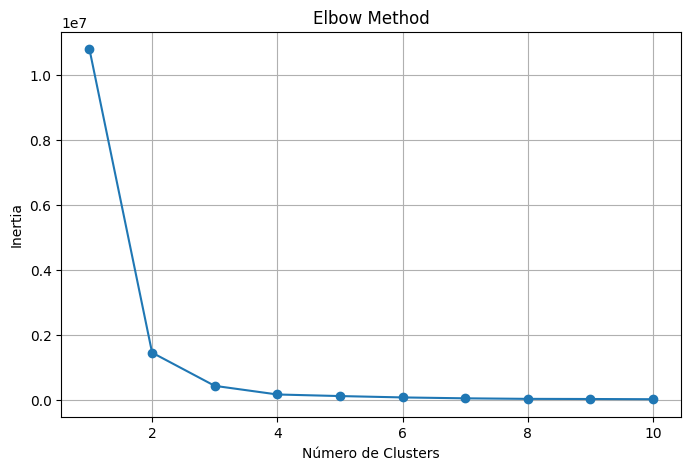

In [110]:
# Lista para armazenar os valores de inertia
inertia = []

# Testar diferentes números de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_tratado[colunas_numericas])
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
# Aplicar clustering (exemplo com K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
df_tratado['cluster'] = kmeans.fit_predict(df_tratado[colunas_numericas])

# Tratar outliers dentro de cada cluster usando IQR
for cluster in df_tratado['cluster'].unique():
    cluster_data = df_tratado[df_tratado['cluster'] == cluster]
    
    for col in colunas_numericas:
        Q1 = cluster_data[col].quantile(0.25)
        Q3 = cluster_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Substituir outliers pela mediana do cluster
        median_value = cluster_data[col].median()
        df_tratado.loc[
            (df_tratado['cluster'] == cluster) & 
            ((df_tratado[col] < lower_bound) | (df_tratado[col] > upper_bound)), 
            col
        ] = median_value

# Exibir DataFrame tratado
display(df_tratado)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,ocorrencia_ano,outlier_total_recomendacoes,outlier_total_aeronaves_envolvidas,cluster
0,86954,ACIDENTE,TUPANCIRETA,RS,SIPJ,17:20:00,NAO,ATIVA,A DEFINIR,NAO,UNKNOWN,0,1,NAO,PTOCO,UNKNOWN,AVIAO,PIPER AIRCRAFT,PA-28R-201,P28R,PISTAO,MONOMOTOR,1247.0,1247.0,4.0,1990.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERO PARQUE TUPA,SANTA MARIA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,COLISAO COM OBSTACULO DURANTE A DECOLAGEM E POUSO,COLISAO COM OBSTACULO DURANTE A DECOLAGEM E POUSO,CTOL,Intermediário (1990-2009),2025.0,normal,normal,0
1,86953,ACIDENTE,PILAR,AL,FAER,09:05:00,SIM,ATIVA,A DEFINIR,NAO,UNKNOWN,0,1,NAO,PTUYQ,UNKNOWN,AVIAO,EMBRAER,EMB-202A,IPAN,PISTAO,MONOMOTOR,1800.0,1800.0,1.0,2010.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,AGRICOLA,SUBSTANCIAL,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,Novo (2010+),2025.0,normal,normal,0
2,86952,INCIDENTE,SAO LUIS,MA,SBSL,20:45:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,1,NAO,PTZPH,UNKNOWN,AVIAO,INPAER - INDUSTRIA PAULISTA DE AERONAUTICA,EXPLORER,ZZZZ,PISTAO,MONOMOTOR,1200.0,1200.0,34.0,2014.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,POUSO,EXPERIMENTAL,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,Novo (2010+),2025.0,normal,normal,0
3,86951,INCIDENTE GRAVE,CHAPECO,SC,SBCH,22:30:00,SIM,ATIVA,IG-048/CENIPA/2025,NAO,UNKNOWN,0,1,SIM,PRMYM,UNKNOWN,AVIAO,AIRBUS,A319-112,A319,JATO,BIMOTOR,75500.0,75500.0,154.0,2011.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,GOVERNADOR ANDRE FRANCO MONTORO,SERAFIN ENOSS BERTASO,POUSO,REGULAR,LEVE,0.0,INFLUENCIAS EXTERNAS,DESEMPENHO DO SER HUMANO,OPERACAO DA AERONAVE,FATOR MATERIAL,A-015/CENIPA/2021 - 01,2014-04-29,2014-11-25,2016-09-14,DIVULGAR O CONTEUDO DO PRESENTE RELATORIO DURA...,ADOTADA,D.COSTA,COMGAP,EXCURSAO DE PISTA,EXCURSAO DE PISTA,RE,Novo (2010+),2007.0,normal,normal,0
4,86950,INCIDENTE,GUARULHOS,SP,SBGR,11:00:00,SIM,FINALIZADA,UNKNOWN,NAO,UNKNOWN,0,1,NAO,PRXMV,UNKNOWN,AVIAO,BOEING,737-8 MAX,B38M,UNKNOWN,BIMOTOR,82644.0,82644.0,0.0,2021.0,BRASIL,BRASIL,AVIAO,NAO REGULAR,SENADOR PETRONIO PORTELLA,GOVERNADOR ANDRE FRANCO MONTORO,POUSO,REGULAR,LEVE,0.0,INFLUENCI